In [ ]:
import os

list_numbers = []
# list_muon_names = sorted(os.listdir("./125_light/muons_1x1"))

list_muon_names = os.listdir("./125_light/muons_1x1")
# print(list_muon_names[0])
for element in list_muon_names:
    muon_name = element.split(".")
    if muon_name[1] == "txt":
        continue
    else:
        muon_number = int(muon_name[0].split("n")[1])
        list_numbers.append(muon_number)
        # print(element)
        
list_numbers = sorted(list_numbers)

[51, 86, 75, 4, 10, 90, 6, 69, 8, 28, 7, 16, 98, 63, 33, 0, 87, 54, 12, 78, 89, 17, 25, 2, 29, 77, 60, 100, 65, 9, 30, 21, 34, 32, 26, 53, 95, 48, 52, 39, 49, 58, 31, 41, 46, 74, 62, 72, 64, 59, 14, 37, 44, 91, 61, 56, 27, 35, 20, 55, 1, 18, 23, 45, 81, 5, 42, 15, 84, 68]
[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 12, 14, 15, 16, 17, 18, 20, 21, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 39, 41, 42, 44, 45, 46, 48, 49, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 68, 69, 72, 74, 75, 77, 78, 81, 84, 86, 87, 89, 90, 91, 95, 98, 100]


In [64]:
list_muon_names = os.listdir("./125_light/muons_1x1")

path = "./125_light/muons_1x1/muon"

list_n_rows_212 = []
list_n_rows_114 = []
n_muon = 0
tot_muon = len(list_muon_names)/2

lists_x_values_212 = []
lists_y_values_212 = []
lists_error_values_212 = []
lists_muon_labels_212 = []

lists_x_values_114 = []
lists_y_values_114 = []
lists_error_values_114 = []
lists_muon_labels_114 = []

for element in list_numbers:
    
    try:
        with open(path+str(element)+'.xye', 'r') as file:
            n_muon += 1
            print(f"Muon {n_muon}/{int(tot_muon)}", end="\r\r")

            n_rows = 0
            base = 0
            x_values = []
            y_values = []
            error_values = []

            for line in file:

                run_Id = line.split(' ')
                if run_Id[1] == 'ohdu:':
                    # print(run_Id[2])
                    extension = run_Id[2].split('\n')[0]
                    # print(extension)

                try:
                    x, y, e = line.split()
                    x, y = int(x), int(y)
                    if base == 1:
                        if y != y_values[-1]:
                            # print(y, y_values[-1])
                            n_rows += 1

                    x_values.append(int(x))
                    y_values.append(int(y))
                    error_values.append(float(e))
                    base = 1
                    # print('hola')

                except ValueError:
                    # Skip empty lines or lines that don't have 3 columns
                    continue
            
            if extension == '212':
                # print(True)
                lists_x_values_212.append(x_values)
                lists_y_values_212.append(y_values)
                lists_error_values_212.append(error_values)
                list_n_rows_212.append(n_rows)
                lists_muon_labels_212.append(element)

            elif extension == '114':
                lists_x_values_114.append(x_values)
                lists_y_values_114.append(y_values)
                lists_error_values_114.append(error_values) 
                list_n_rows_114.append(n_rows)
                lists_muon_labels_114.append(element)

    except:
        continue

# print(f"First 5 X values: {x_values[:5]}")
# print(f"First 5 Y values: {y_values[:5]}")
# print("Y lenght: ", n_rows)

Muon 70/70

In [65]:
lists_new_pxx_212 = []
lists_new_pxy_212 = []

lists_new_pxx_114 = []
lists_new_pxy_114 = []

for index in range(0, len(lists_x_values_212)):

    min_x = min(lists_x_values_212[index])
    min_y = min(lists_y_values_212[index])

    list_new_pxy = []
    list_new_pxx = []

    for jndex in range(0, len(lists_x_values_212[index])):
        new_pxy = lists_y_values_212[index][jndex] - min_y
        new_pxx = lists_x_values_212[index][jndex] - (min_x - 5)

        list_new_pxx.append(new_pxx)
        list_new_pxy.append(new_pxy)
    
    lists_new_pxx_212.append(list_new_pxx)
    lists_new_pxy_212.append(list_new_pxy)

print(list_new_pxy[:5], list_new_pxx[:5])

[0, 0, 1, 1, 1] [7, 8, 8, 7, 6]


In [82]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplt

total_muons = 80
init_muons = 0
list_img_muons = []

for index in range(0, len(lists_new_pxy_212[init_muons:total_muons])):
    n_rows = list_n_rows_212[index]+1
    # n_rows = 120
    # print(n_rows)

    zeros_array = np.zeros([int(n_rows), 13])
    for jndex in range(0, len(lists_new_pxy_212[index])):
        # index= int(tot_muon)
        zeros_array[lists_new_pxy_212[index][jndex]][lists_new_pxx_212[index][jndex]] = lists_error_values_212[index][jndex]

    list_img_muons.append(zeros_array)
    
    # plt.imshow(zeros_array, norm=matplt.colors.LogNorm(), cmap='jet', origin='lower')
    # plt.colorbar()
    # plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of rows:  92


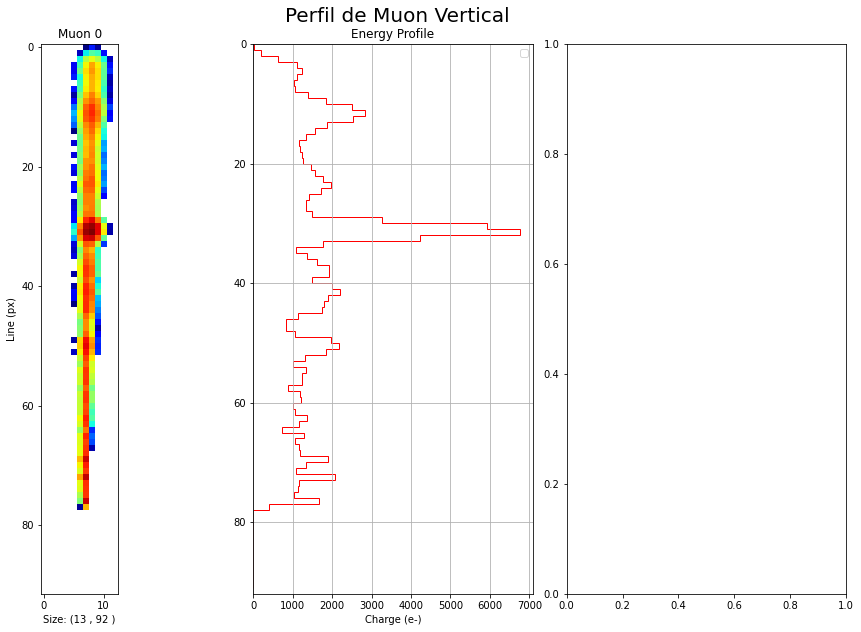

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of rows:  90


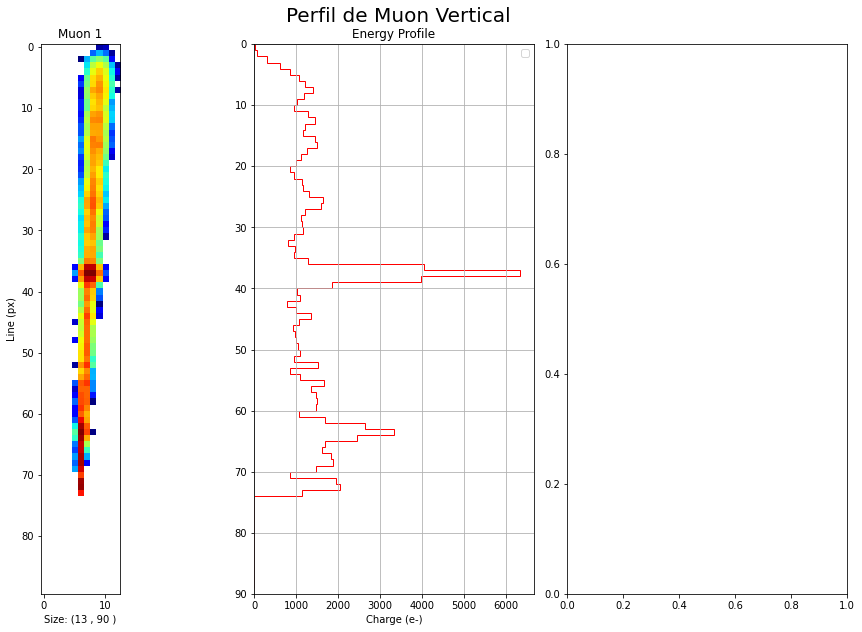

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of rows:  63


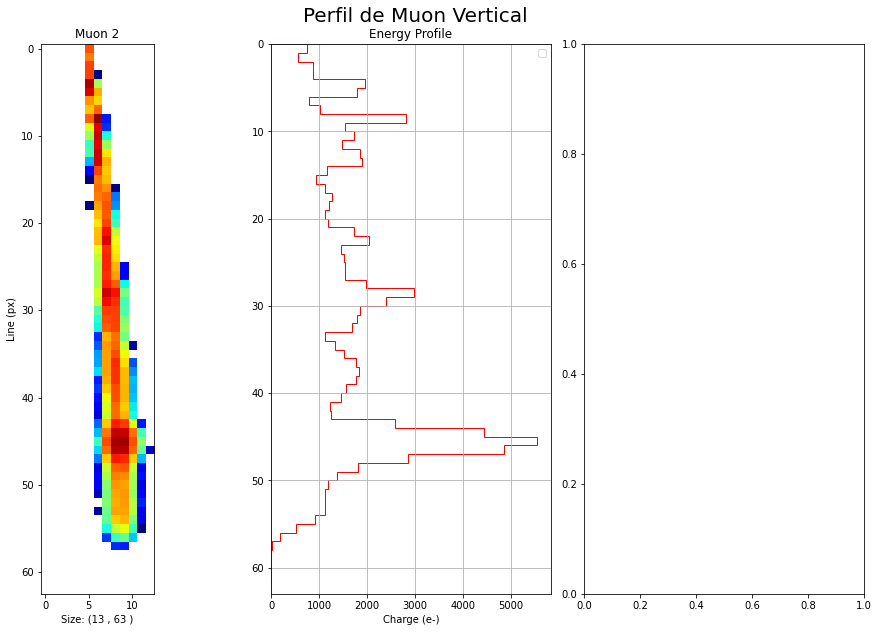

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of rows:  69


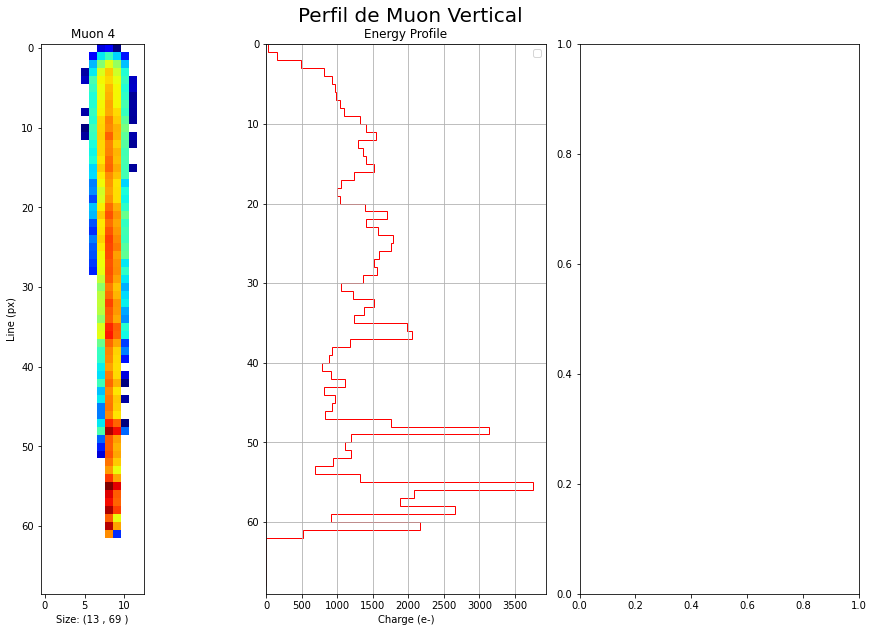

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of rows:  110


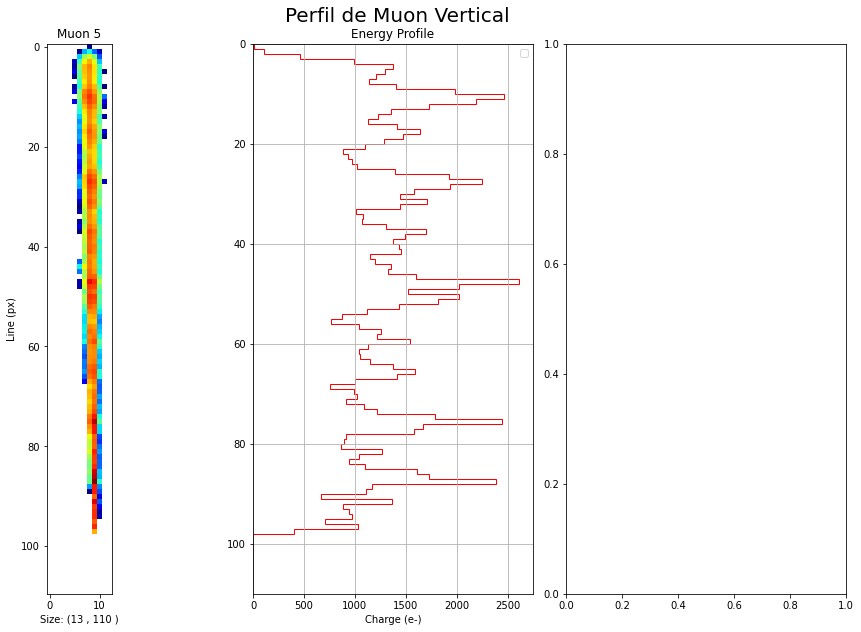

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of rows:  82


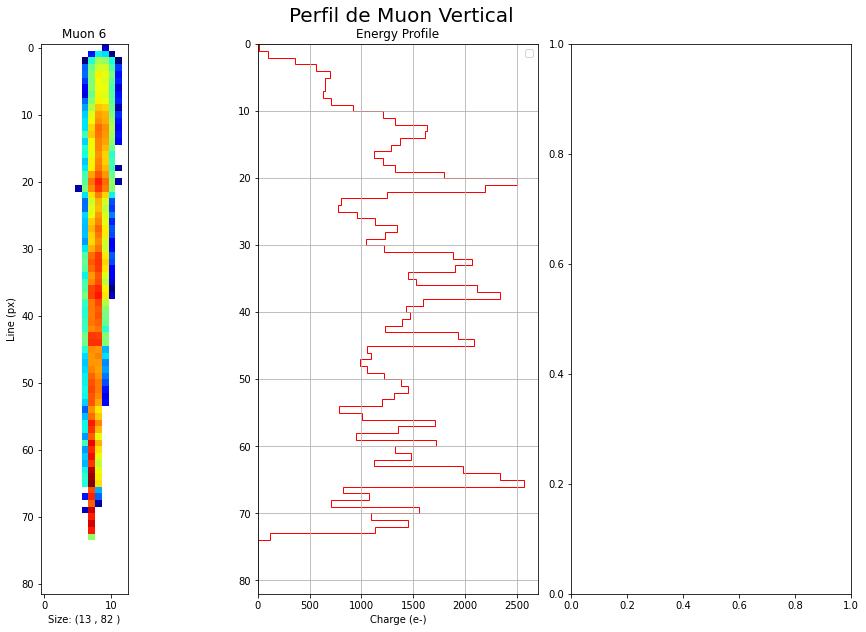

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of rows:  64


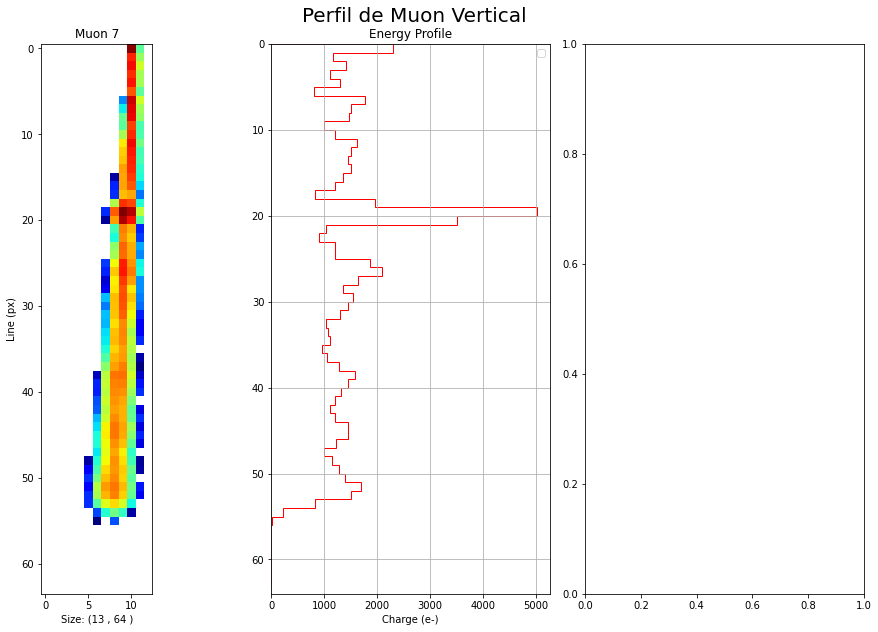

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of rows:  71


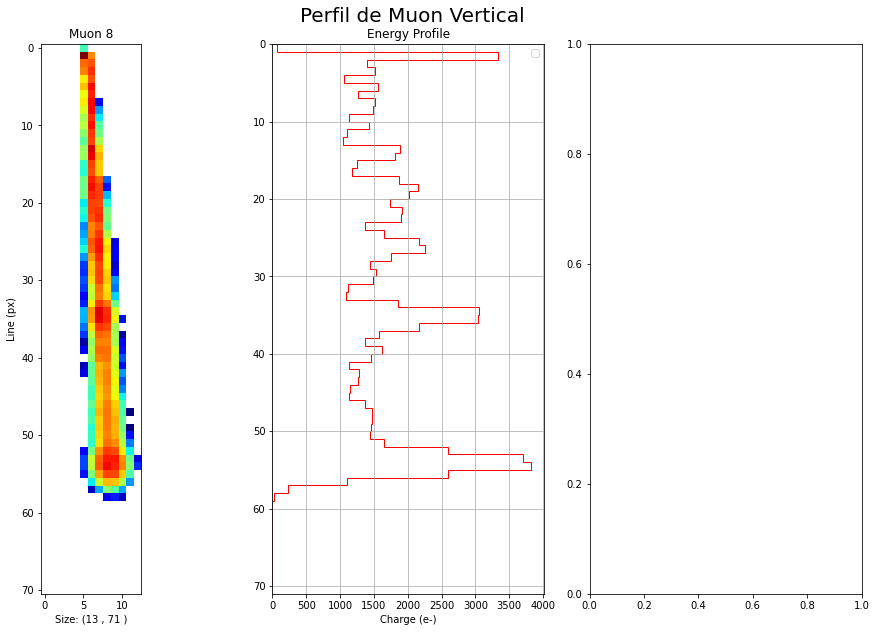

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of rows:  65


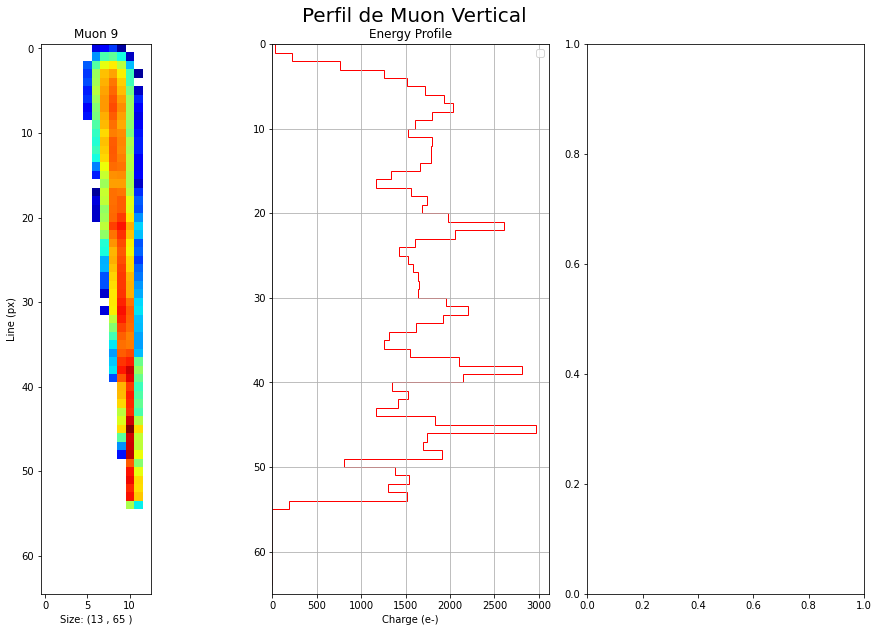

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of rows:  58


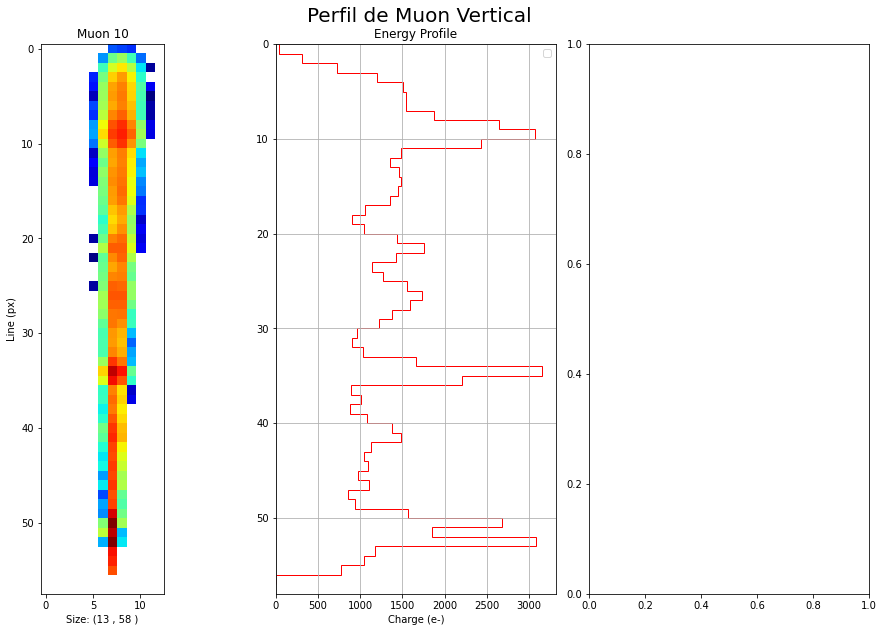

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of rows:  60


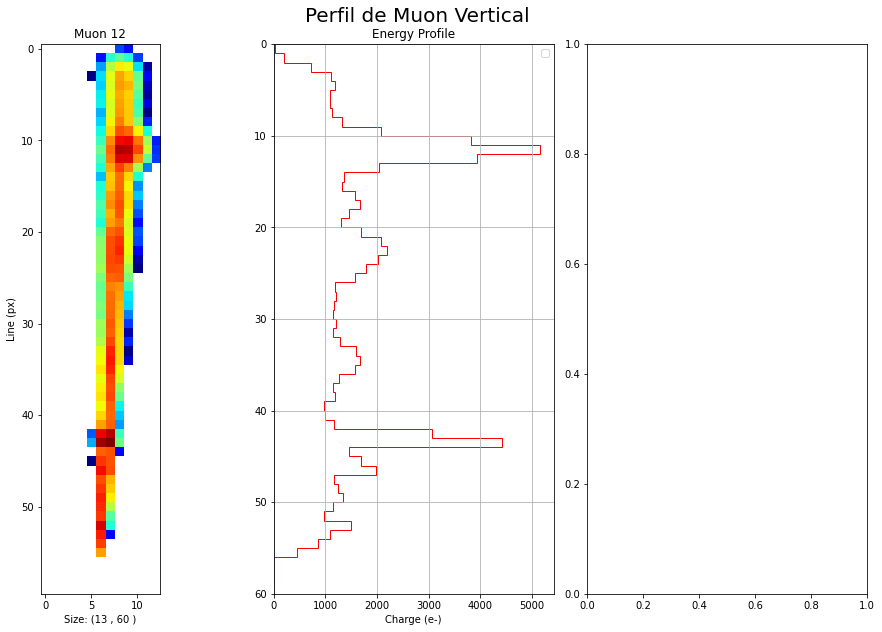

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of rows:  66


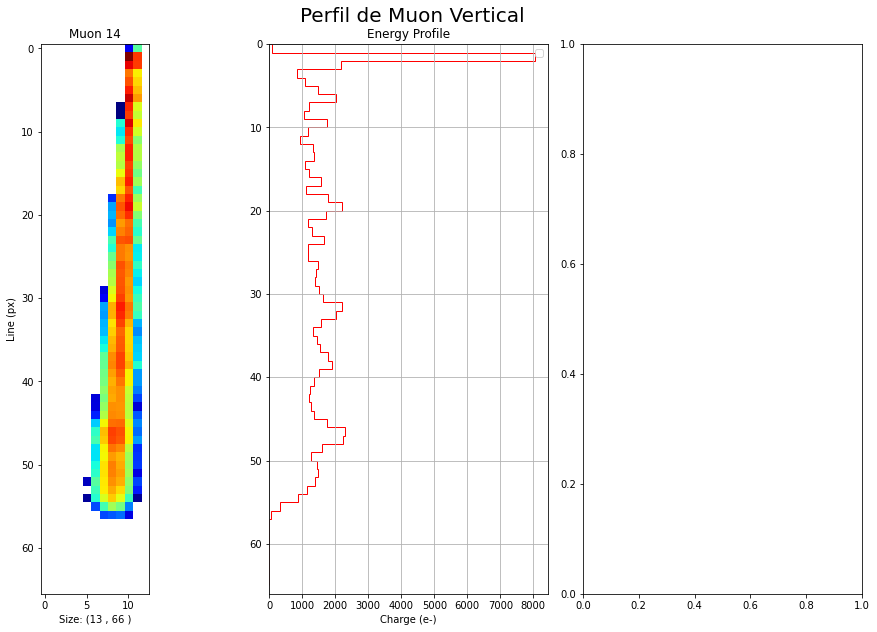

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of rows:  67


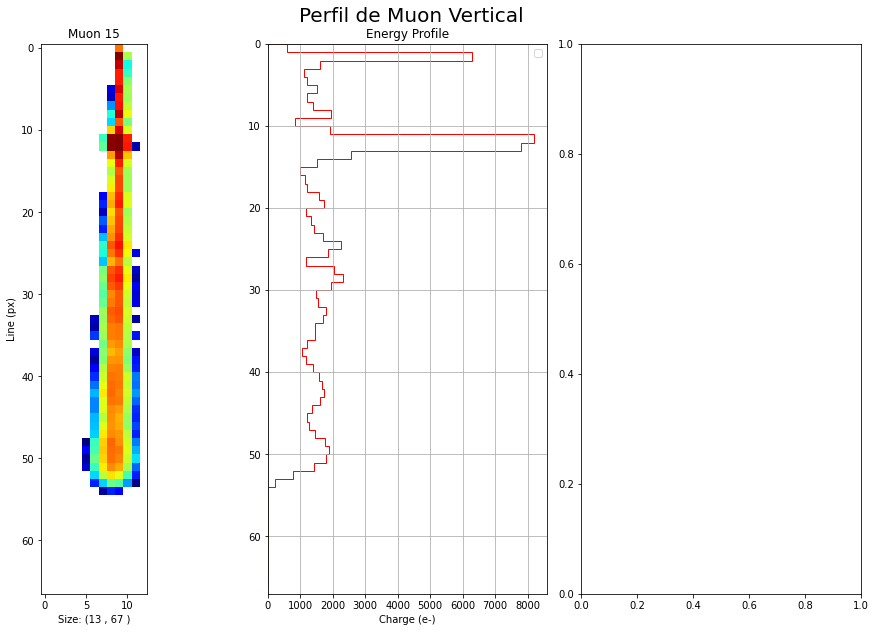

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of rows:  77


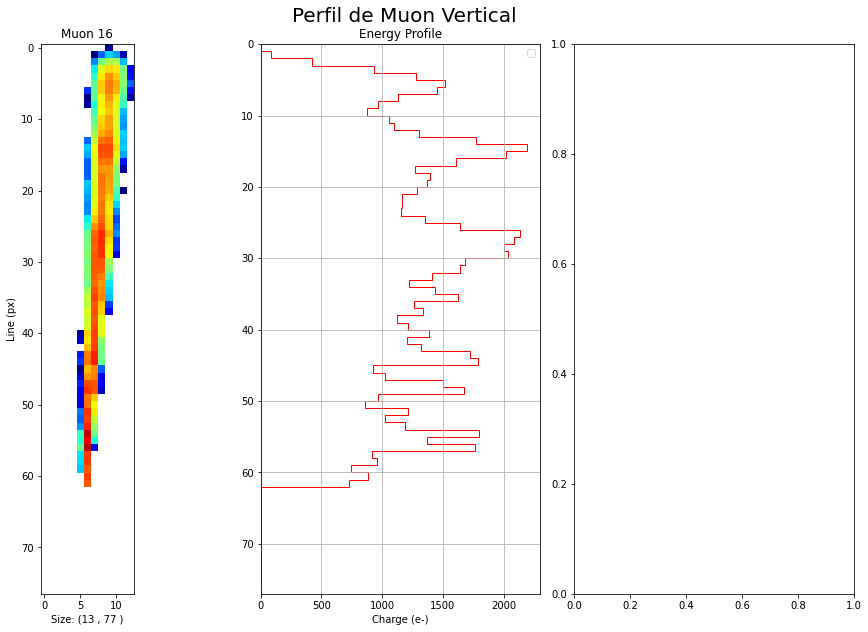

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of rows:  63


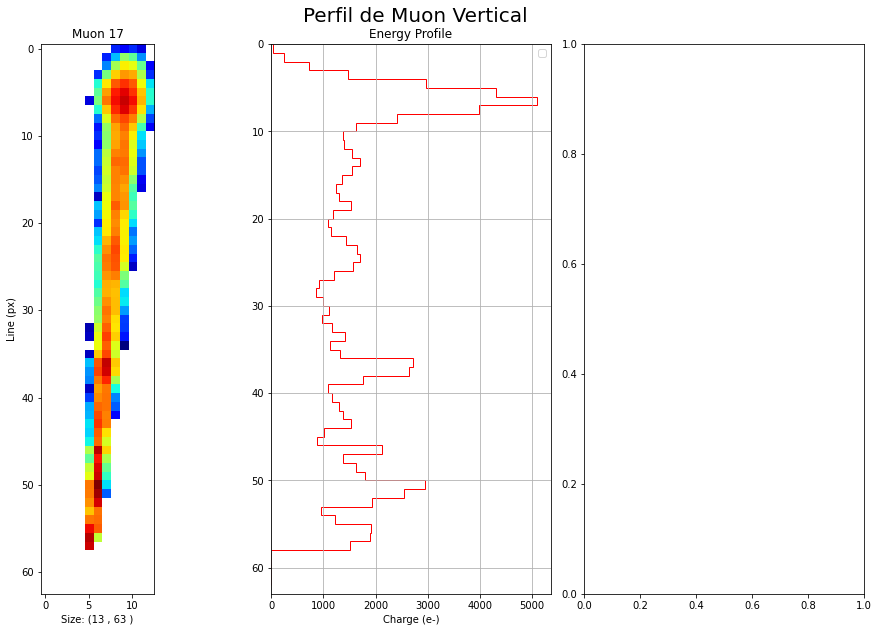

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of rows:  69


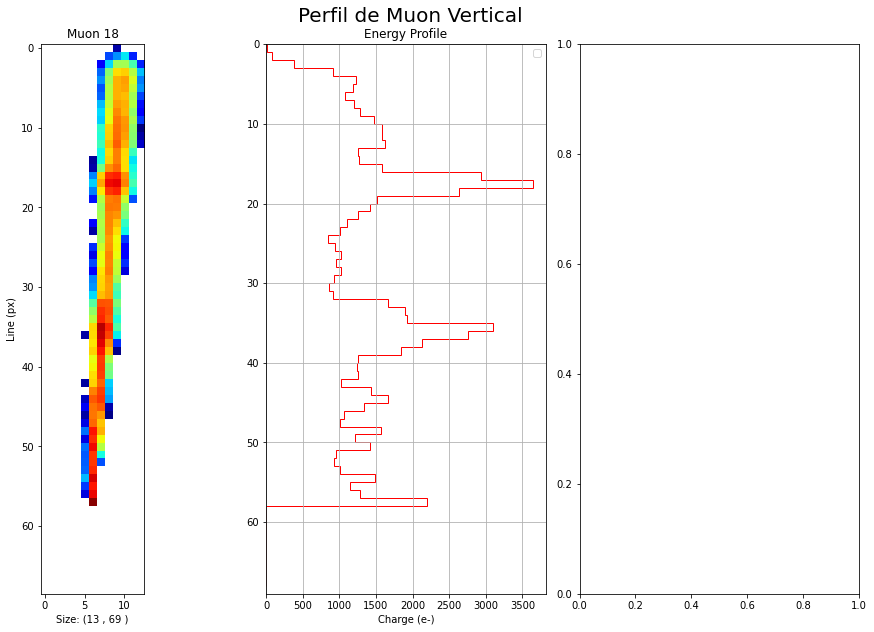

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of rows:  71


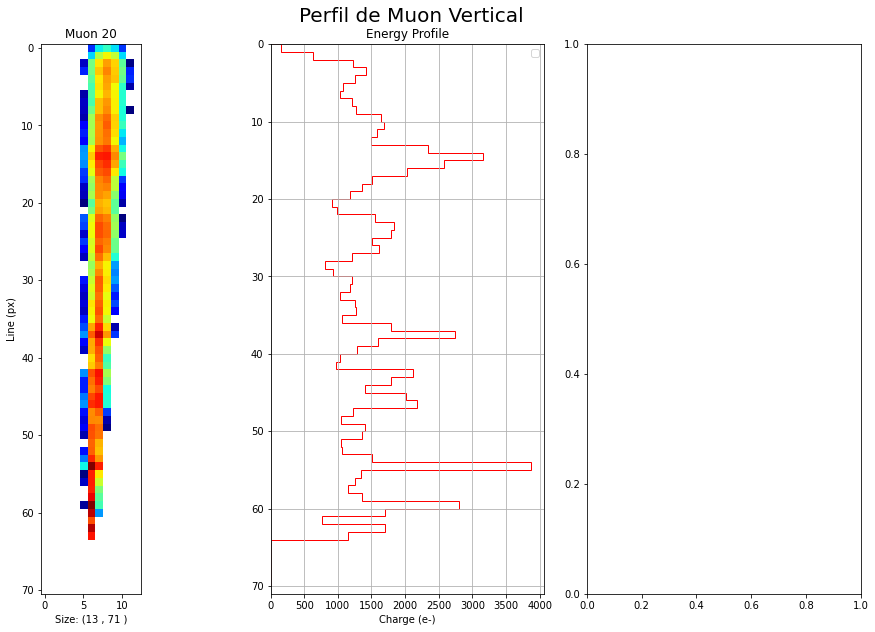

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of rows:  65


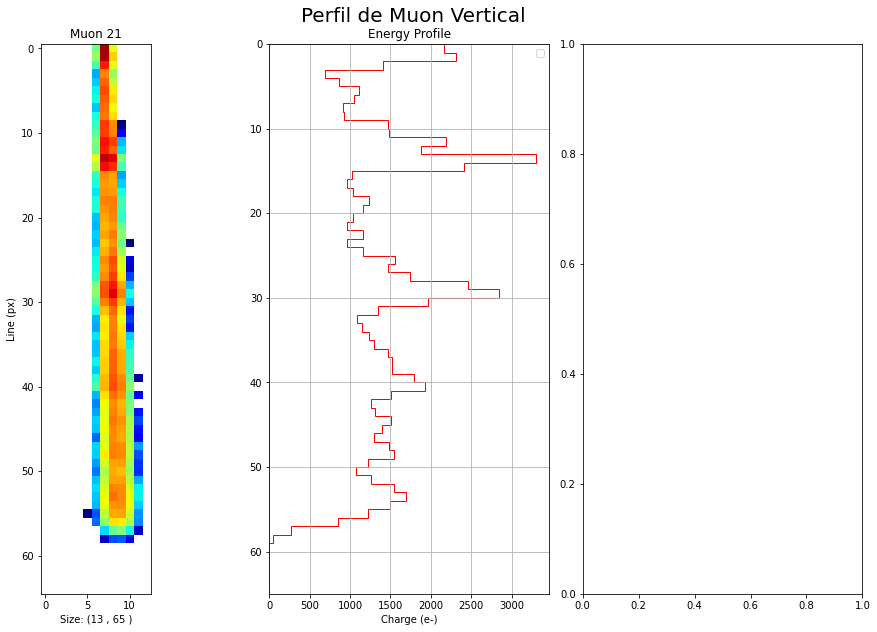

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of rows:  70


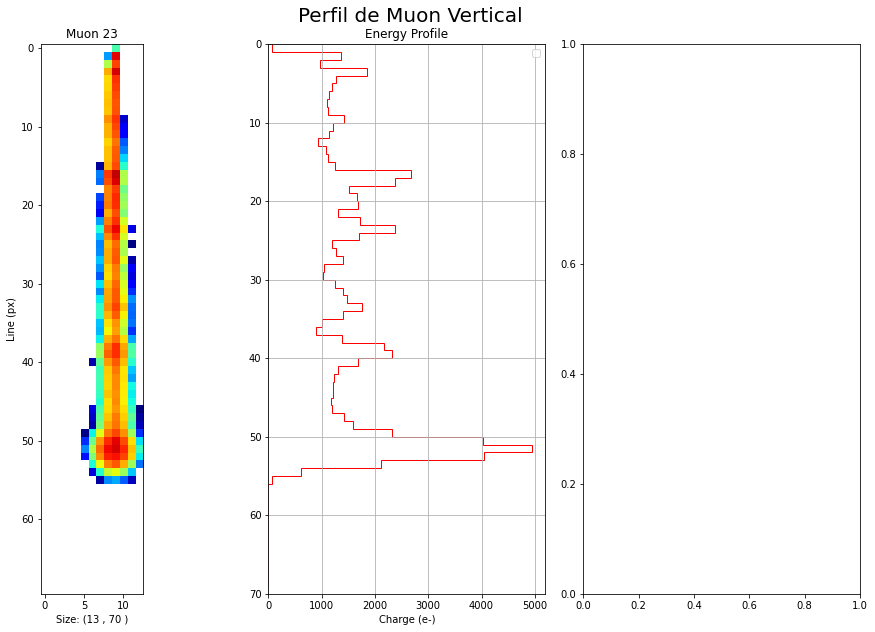

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of rows:  66


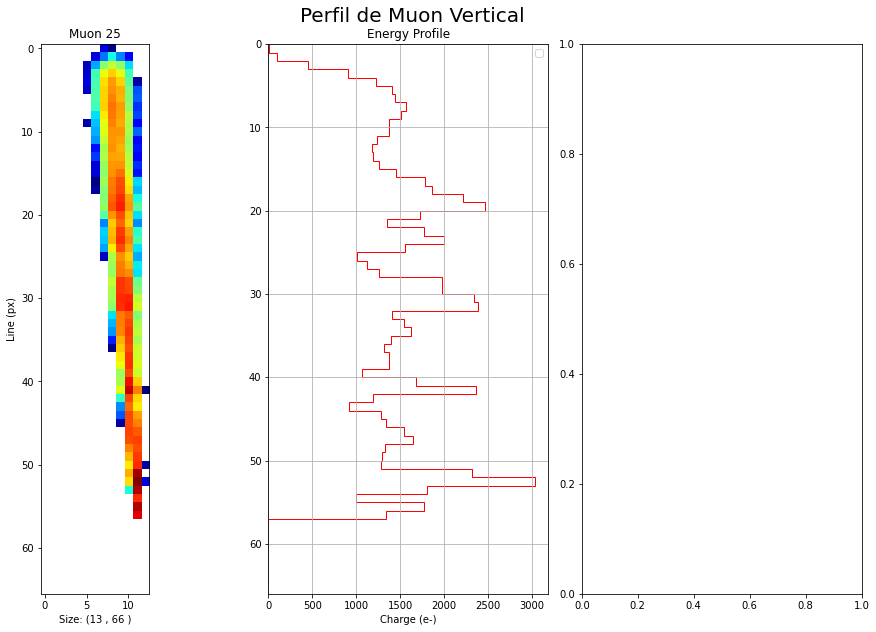

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of rows:  68


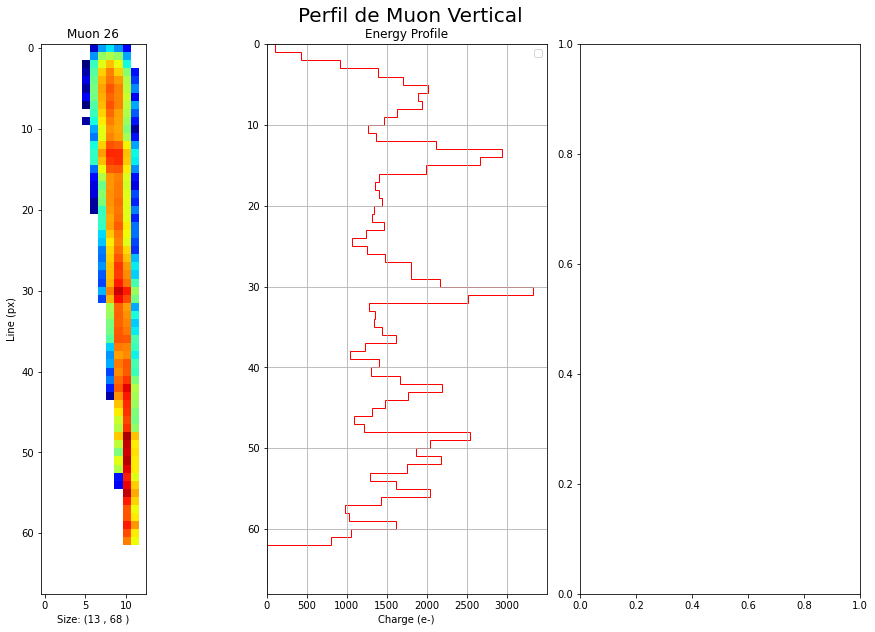

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of rows:  68


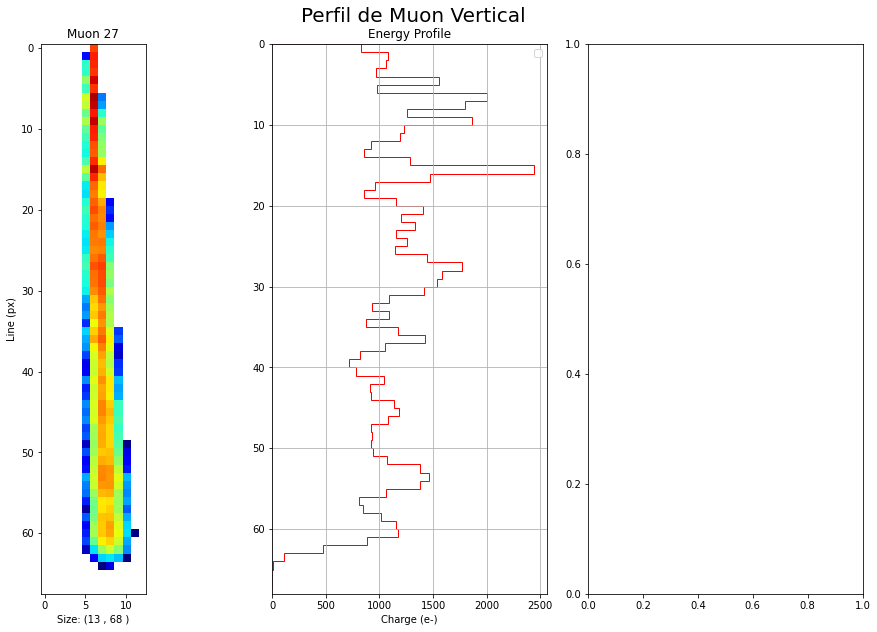

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of rows:  64


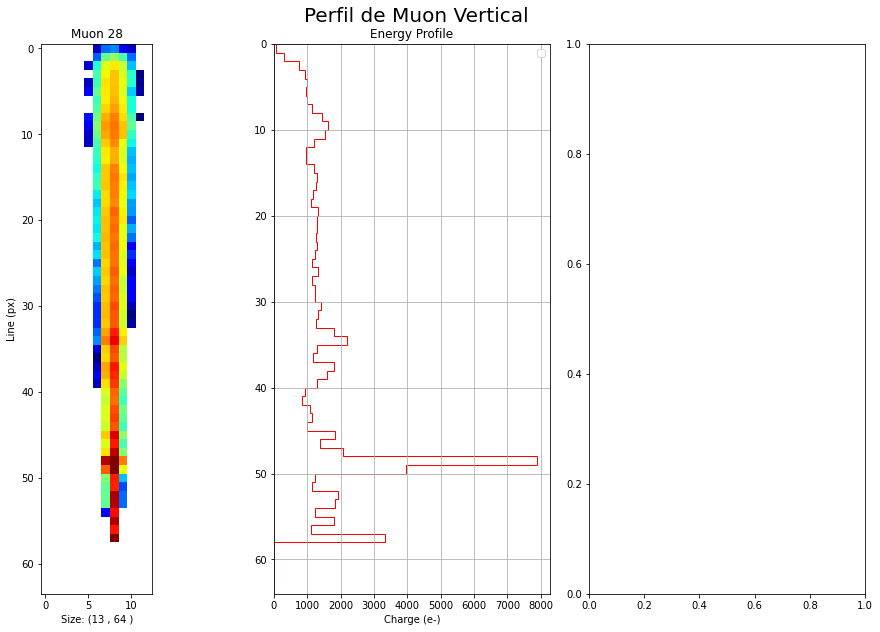

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of rows:  80


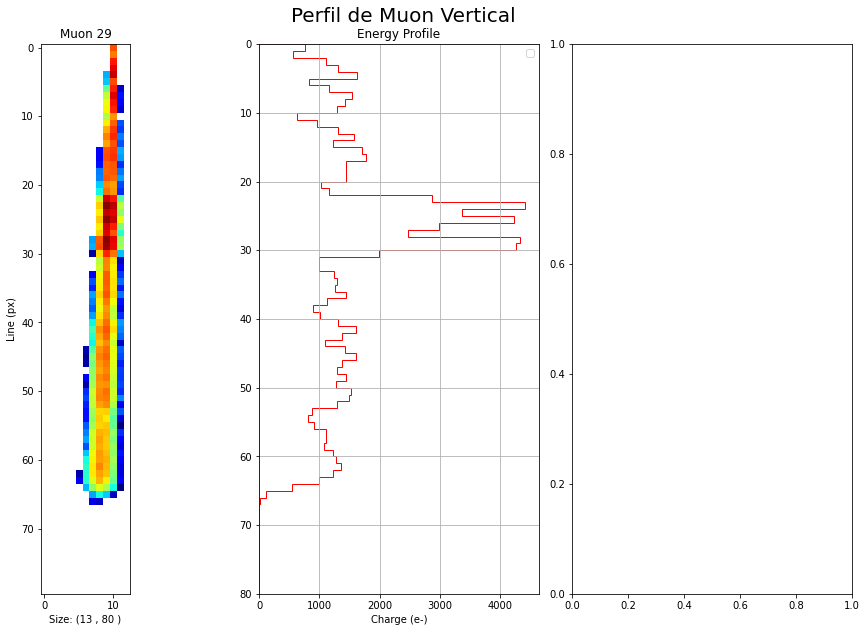

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of rows:  68


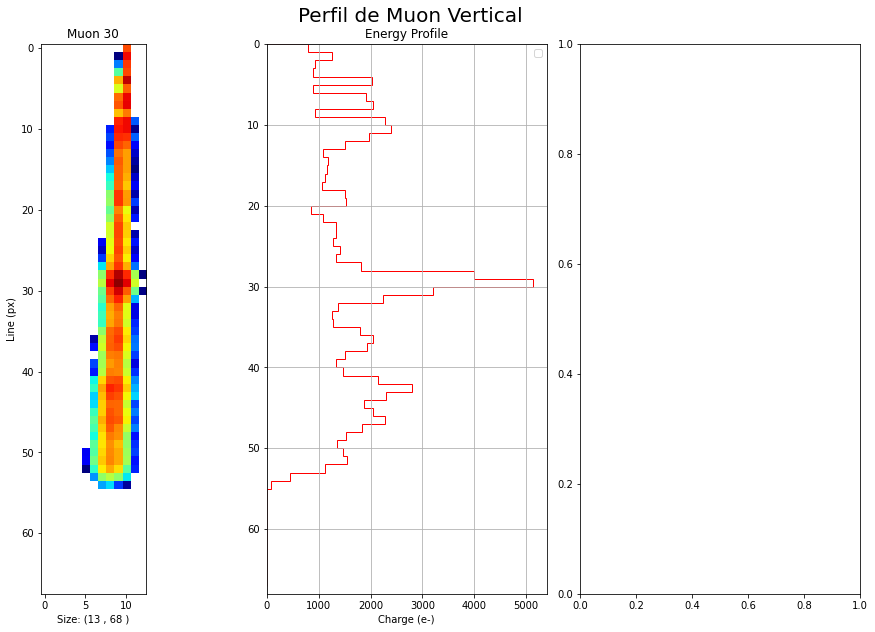

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of rows:  93


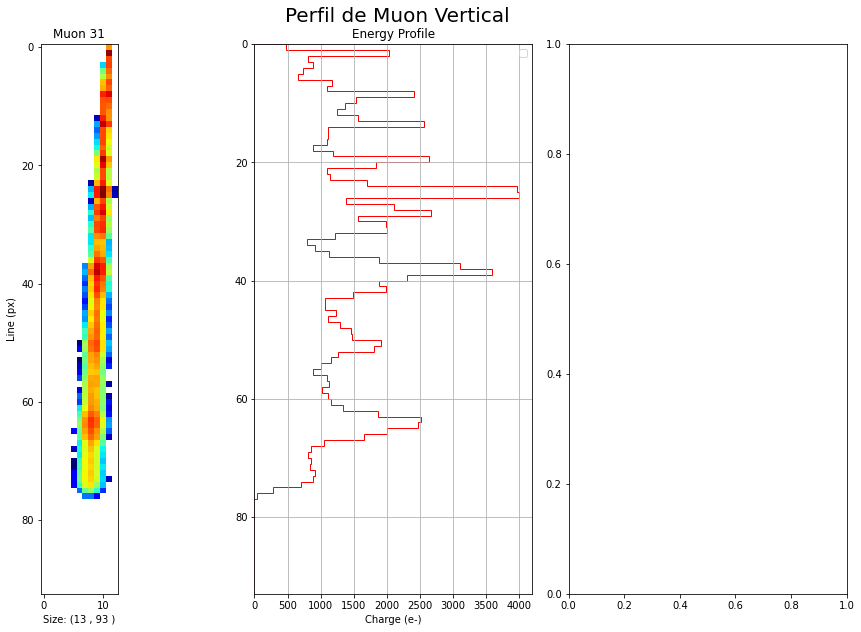

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of rows:  84


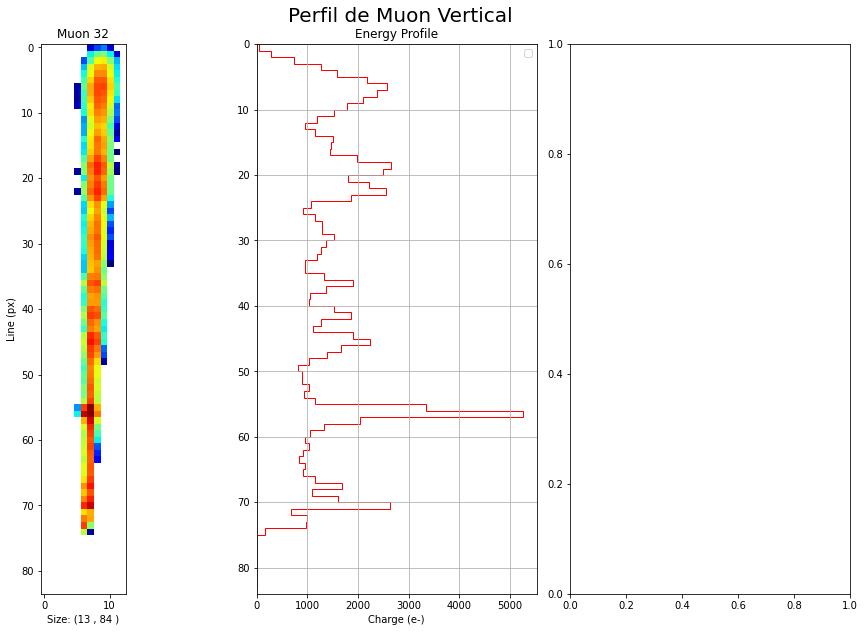

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of rows:  73


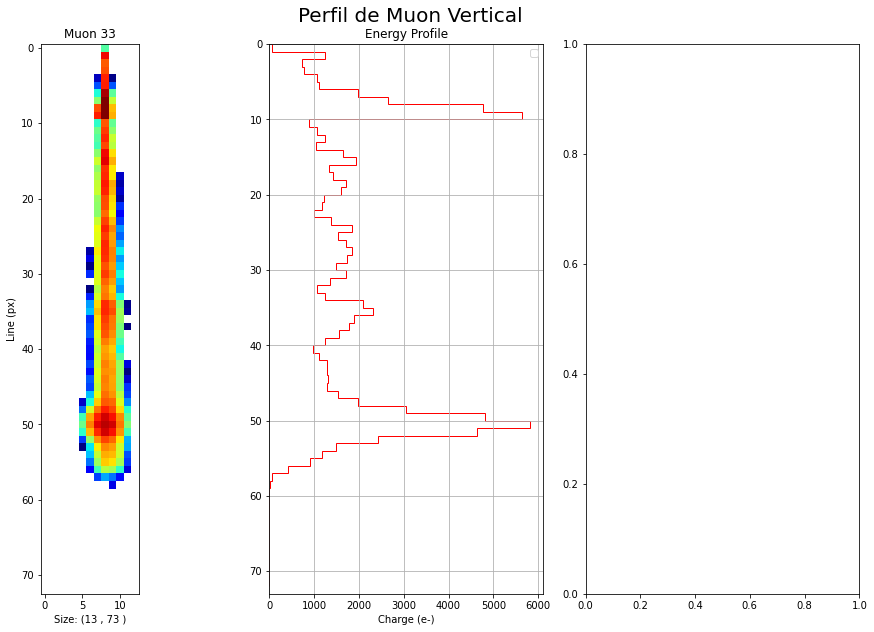

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of rows:  74


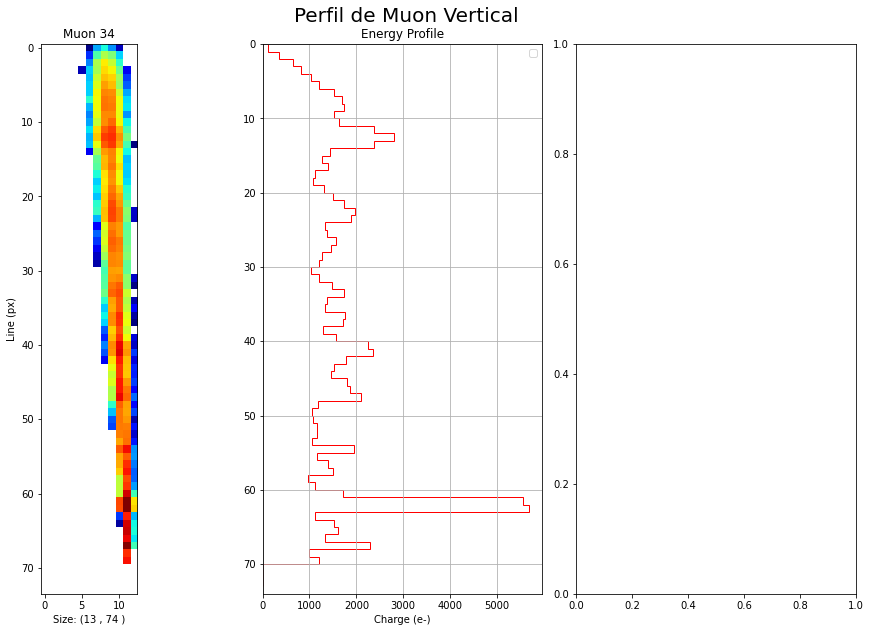

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of rows:  66


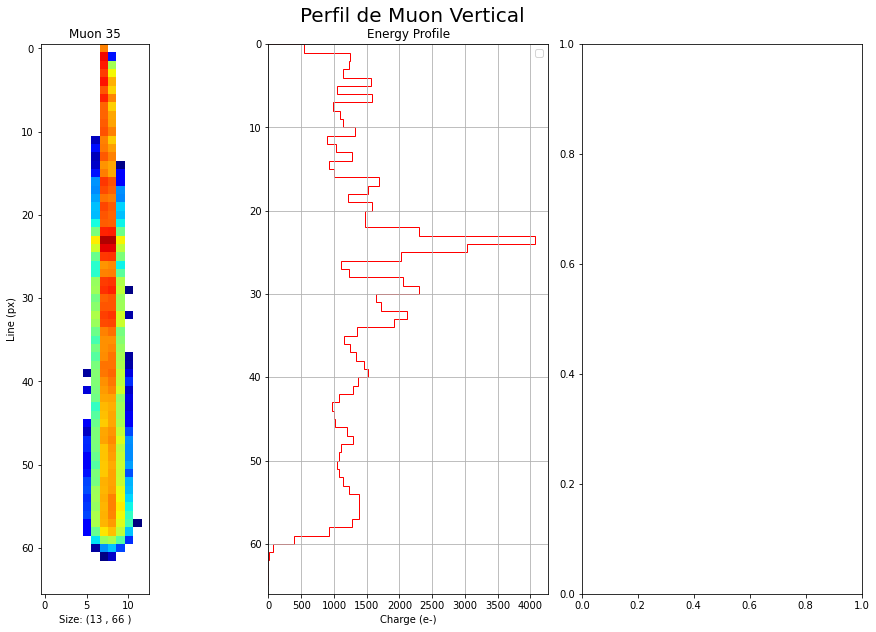

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of rows:  61


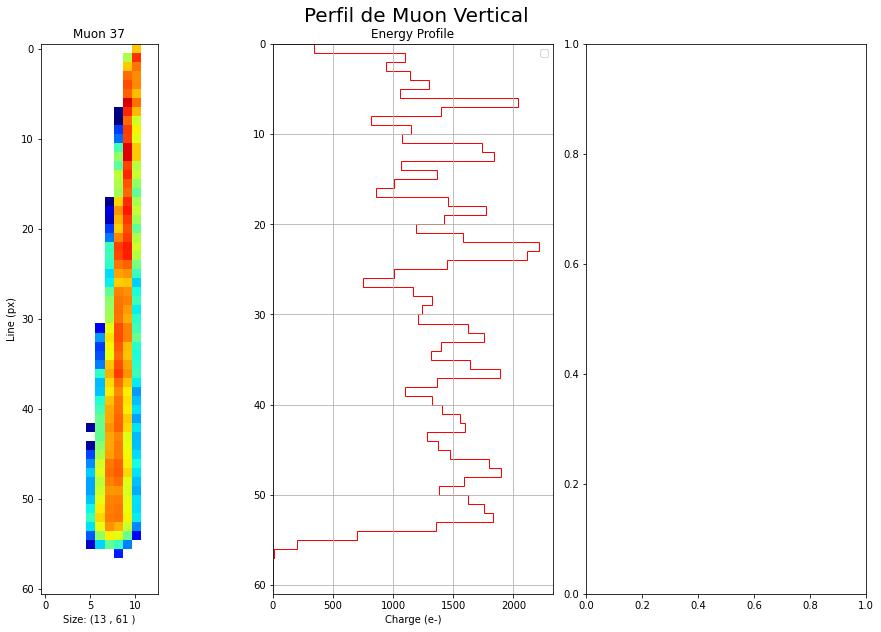

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of rows:  73


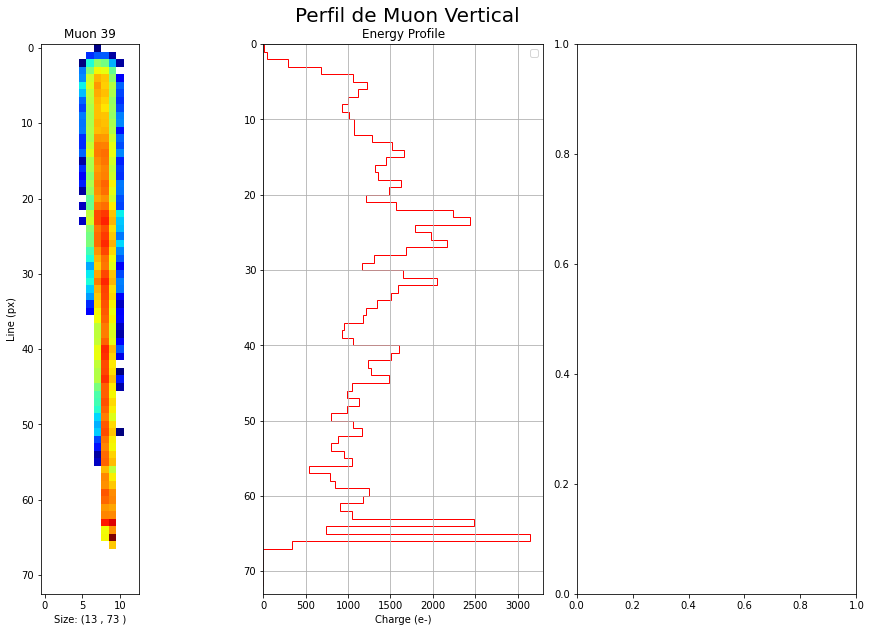

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of rows:  88


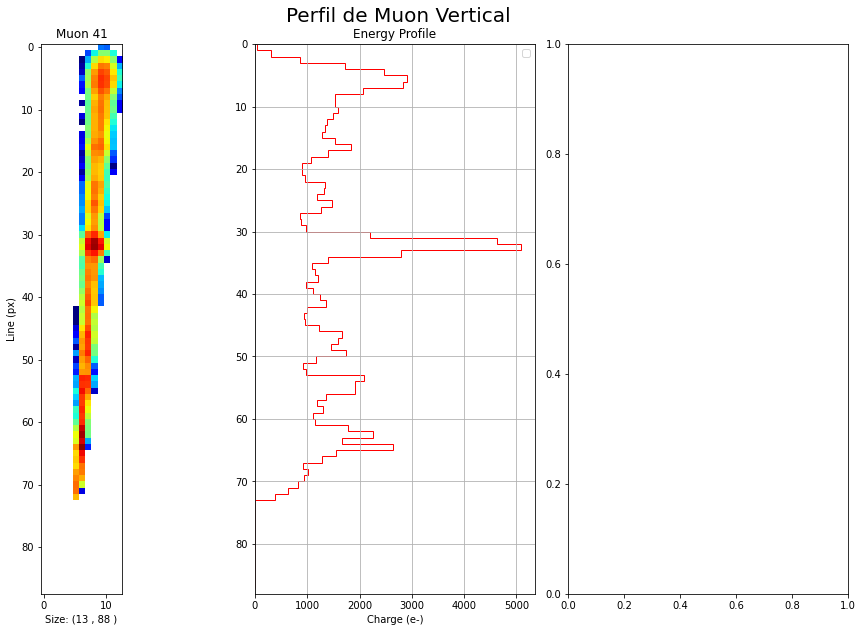

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of rows:  80


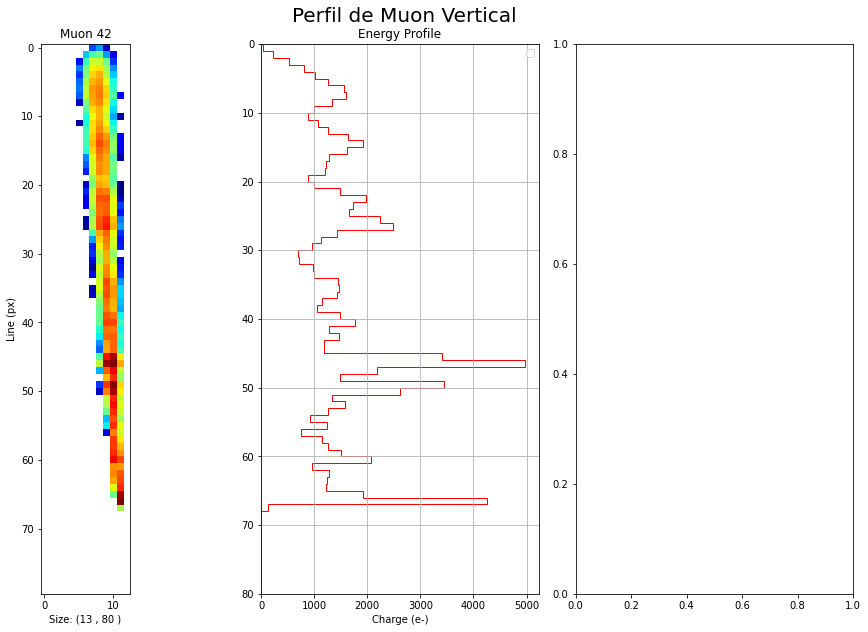

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of rows:  62


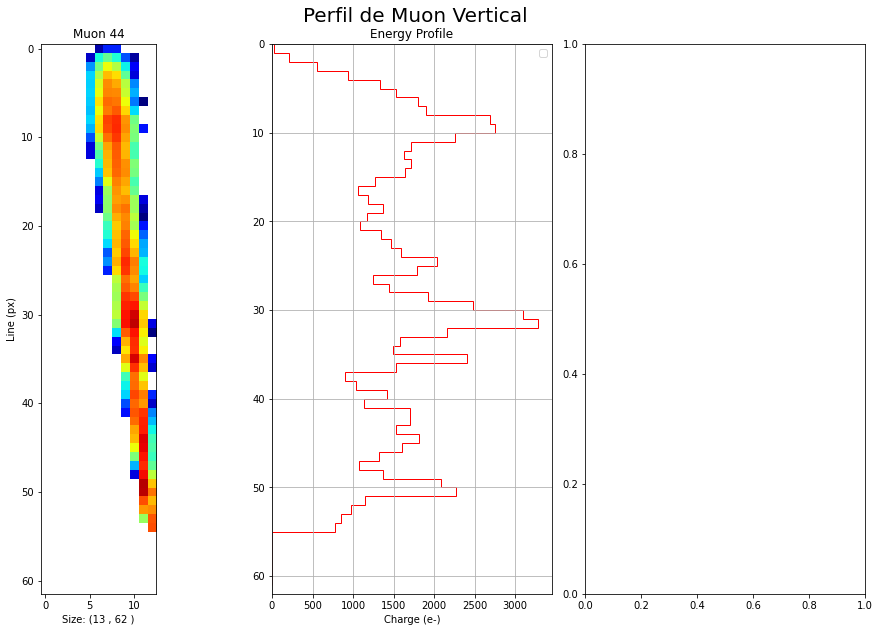

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of rows:  85


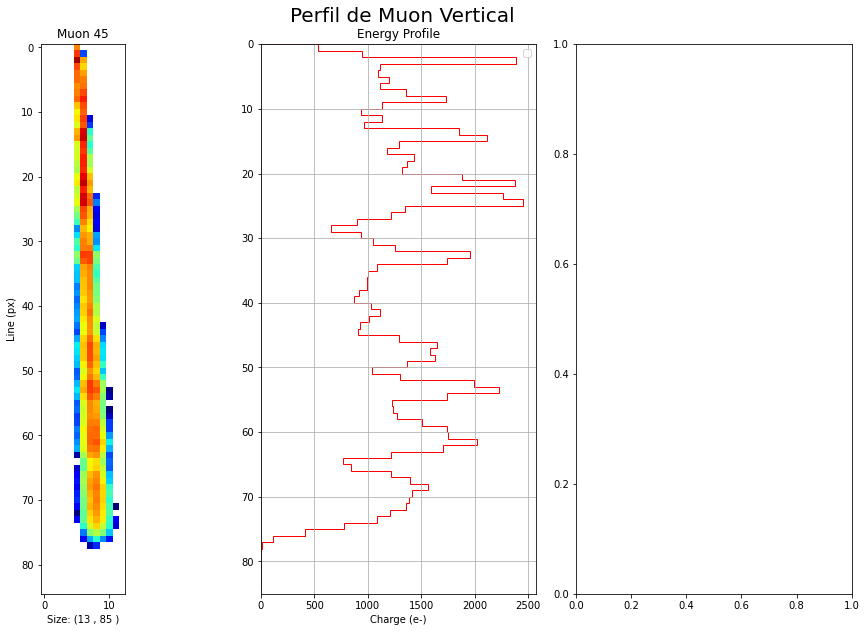

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of rows:  75


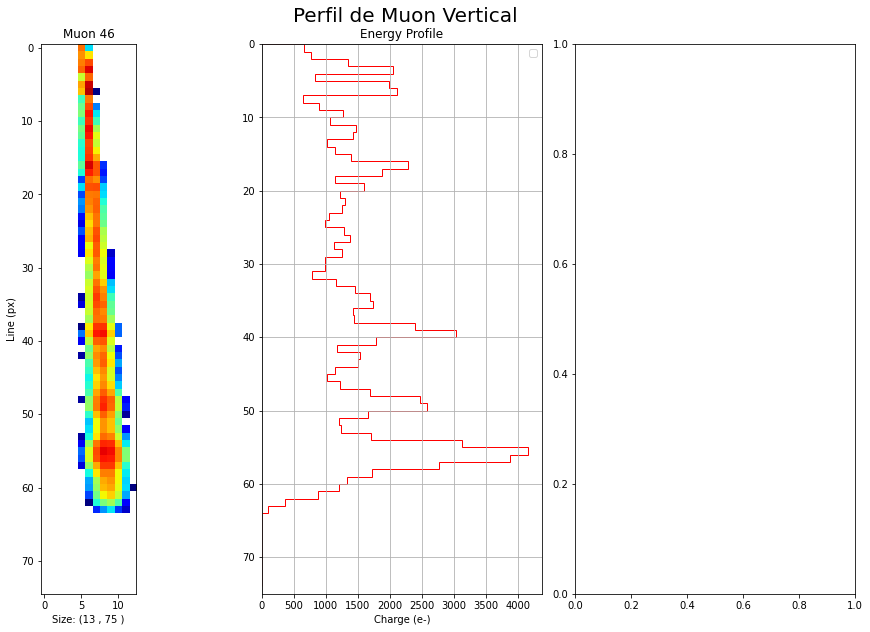

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of rows:  65


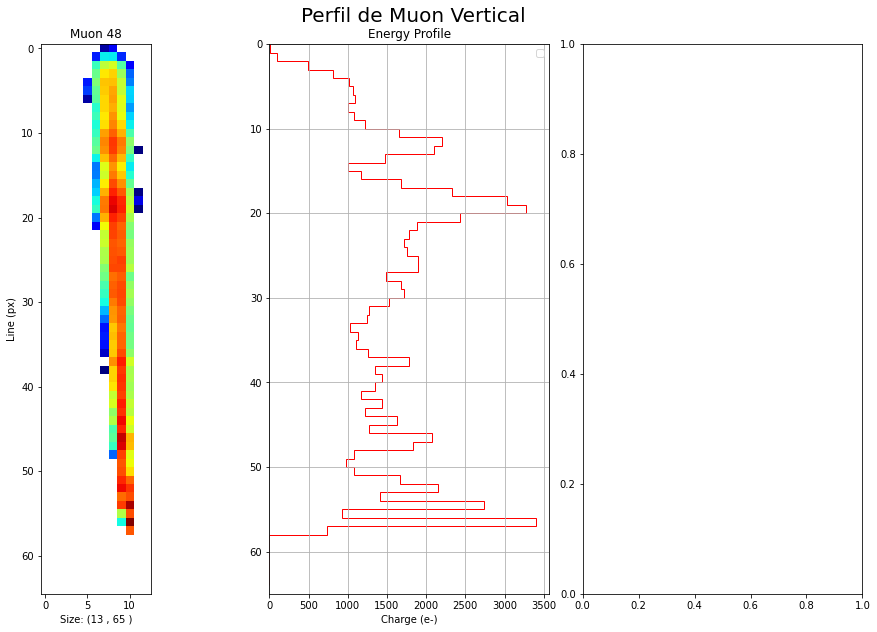

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of rows:  65


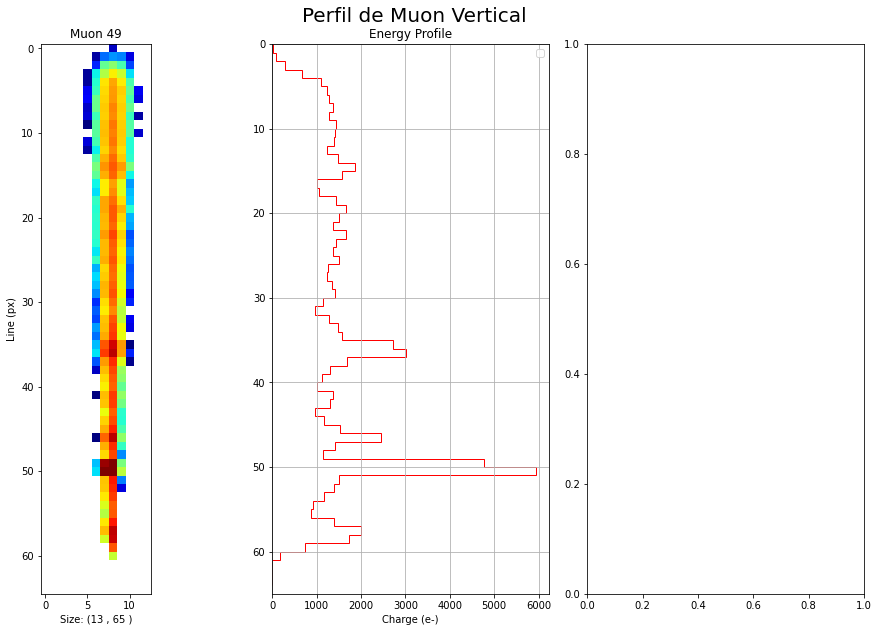

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of rows:  107


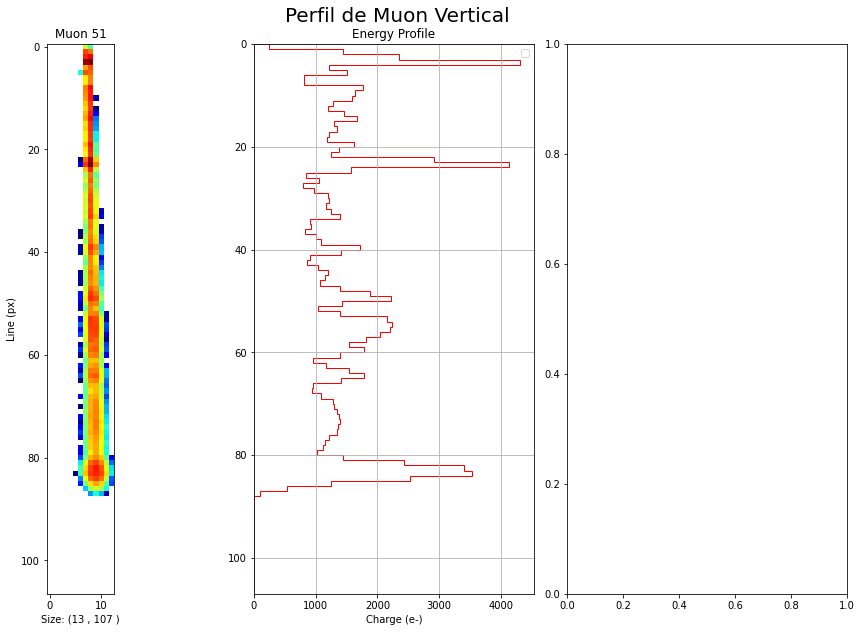

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of rows:  62


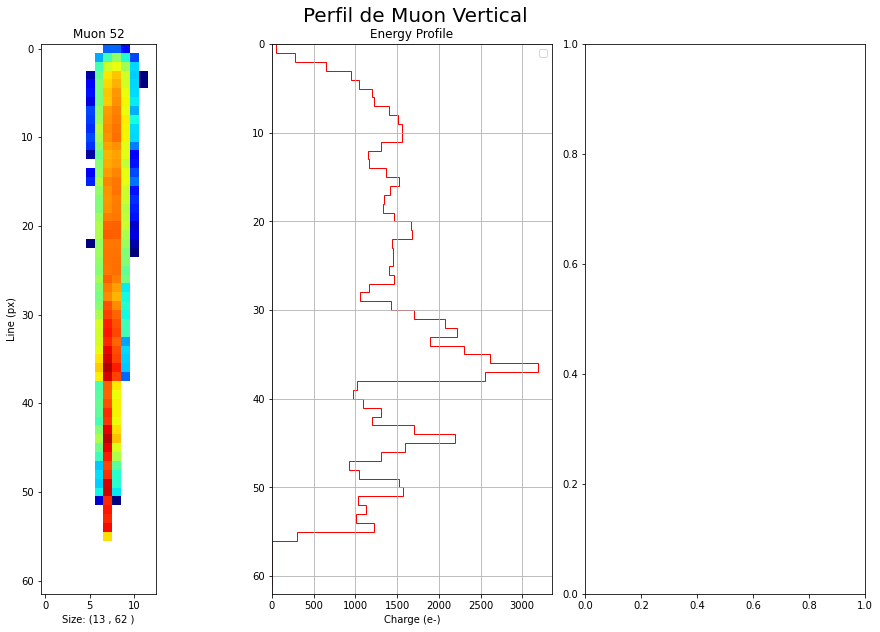

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of rows:  60


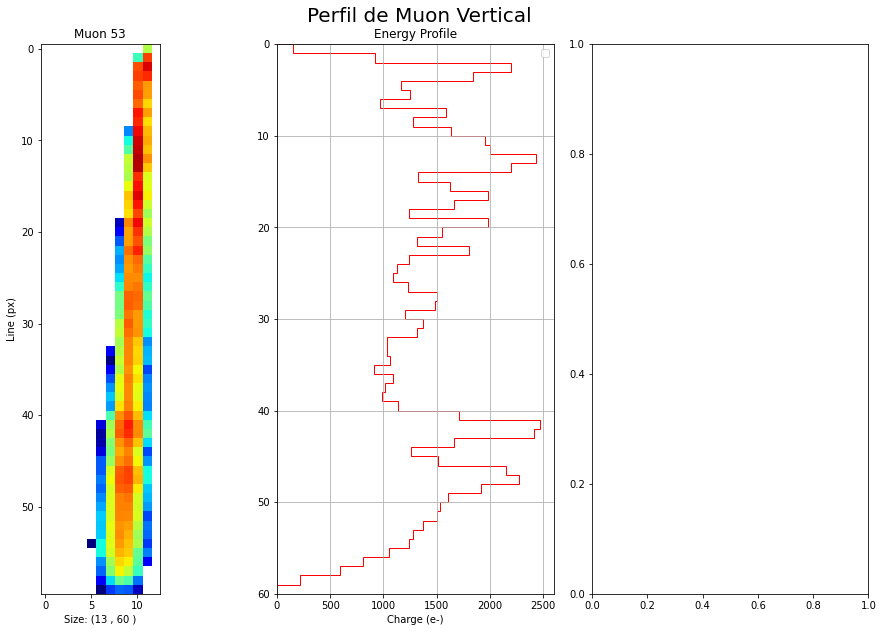

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of rows:  83


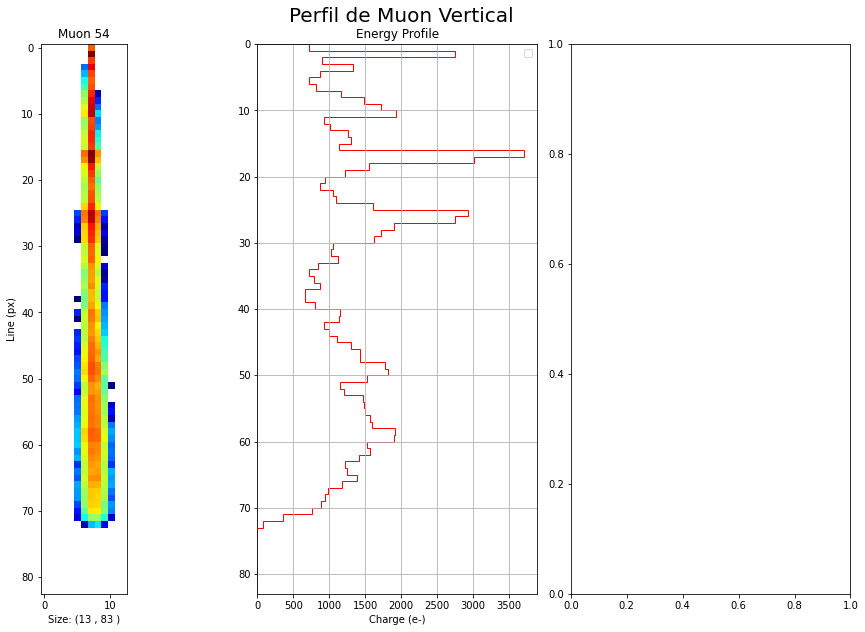

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of rows:  63


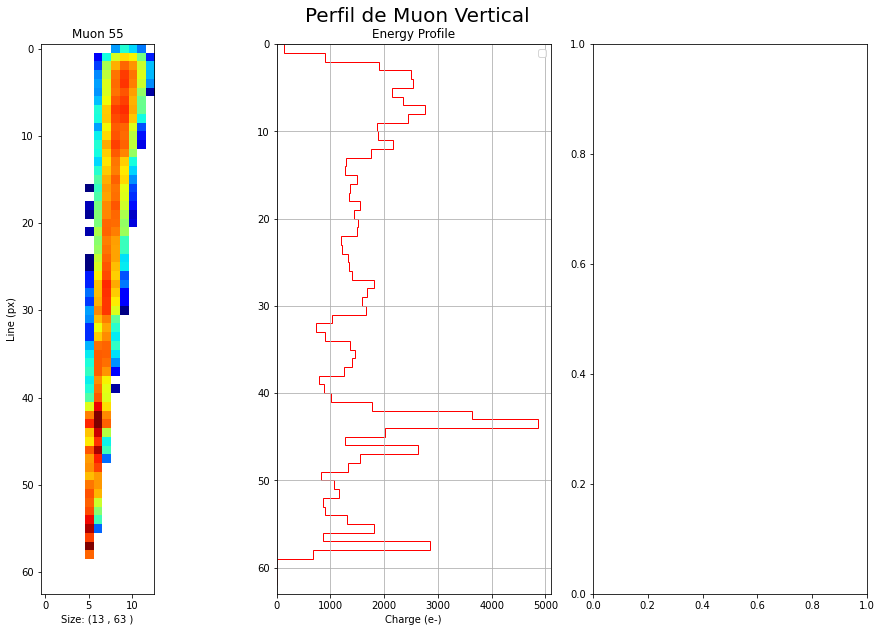

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of rows:  60


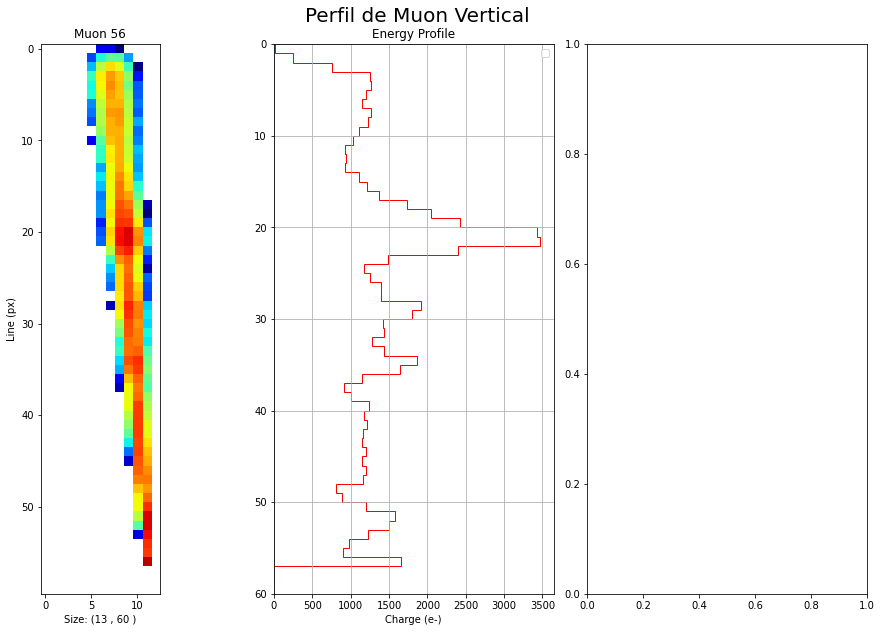

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of rows:  65


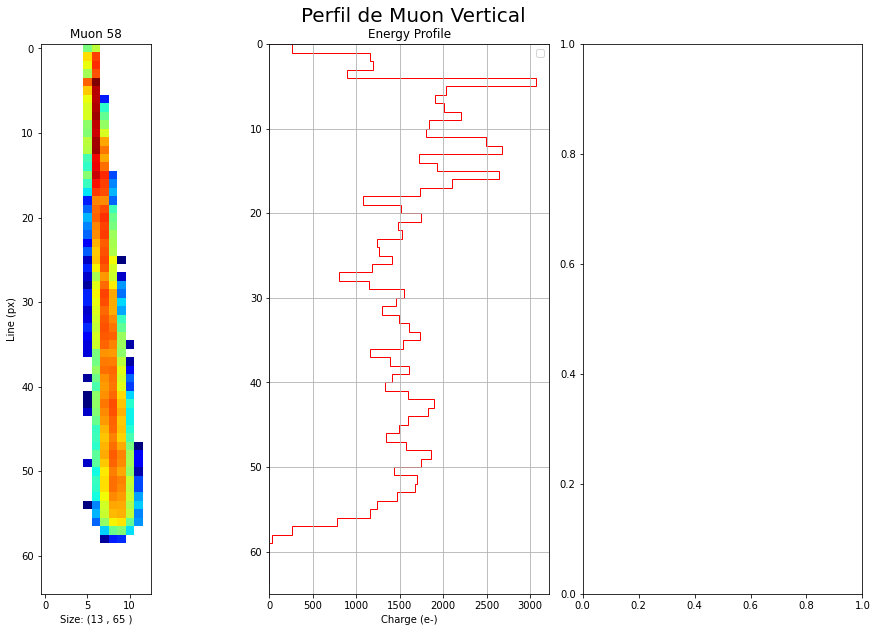

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of rows:  93


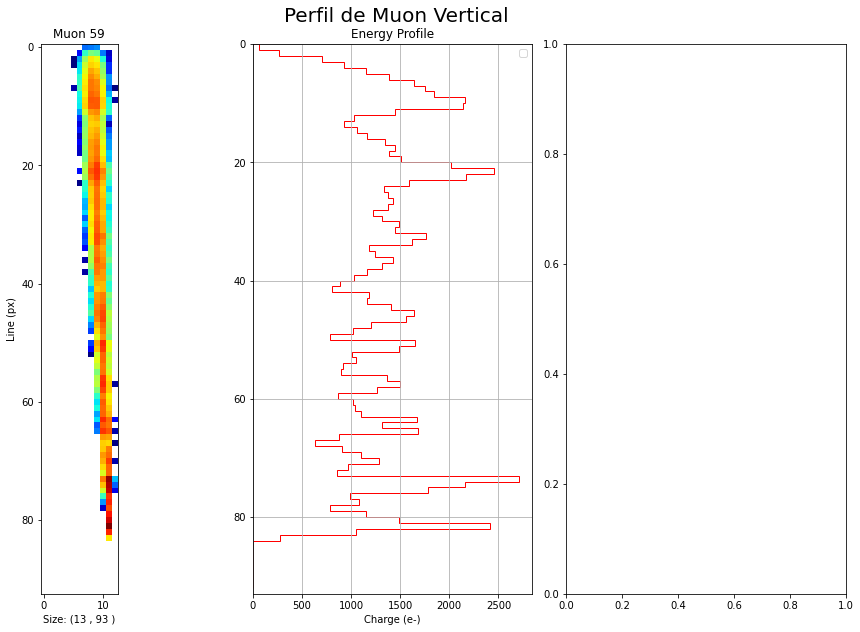

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of rows:  57


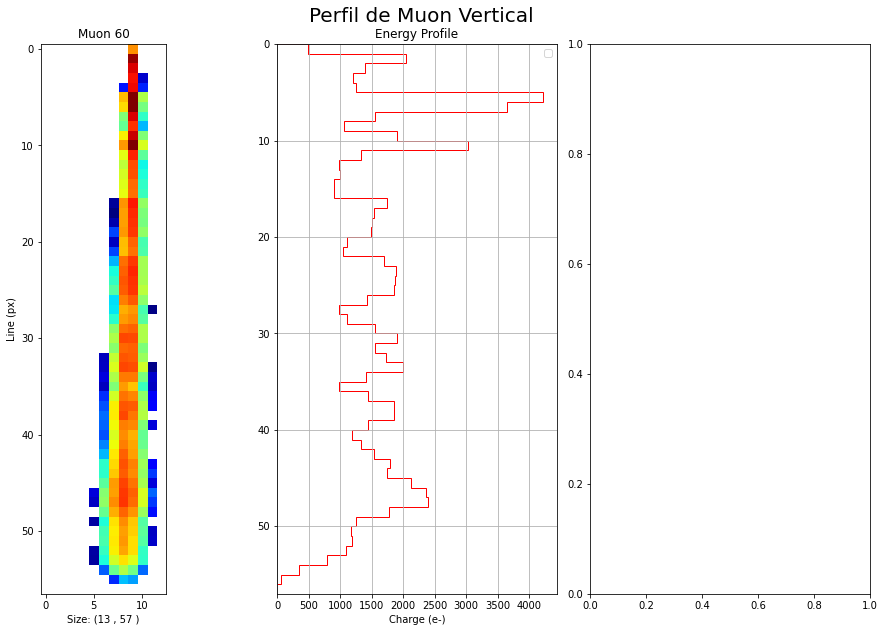

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of rows:  68


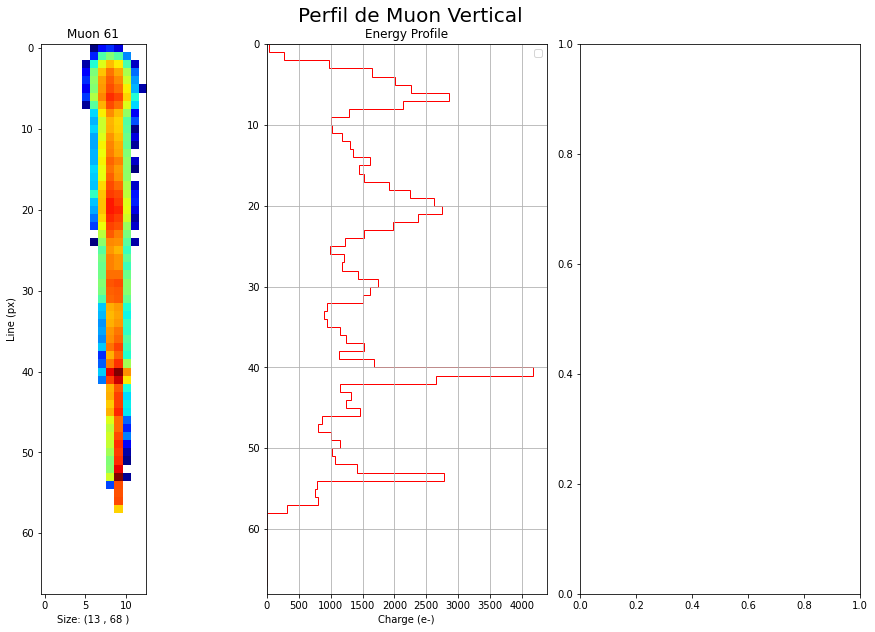

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of rows:  77


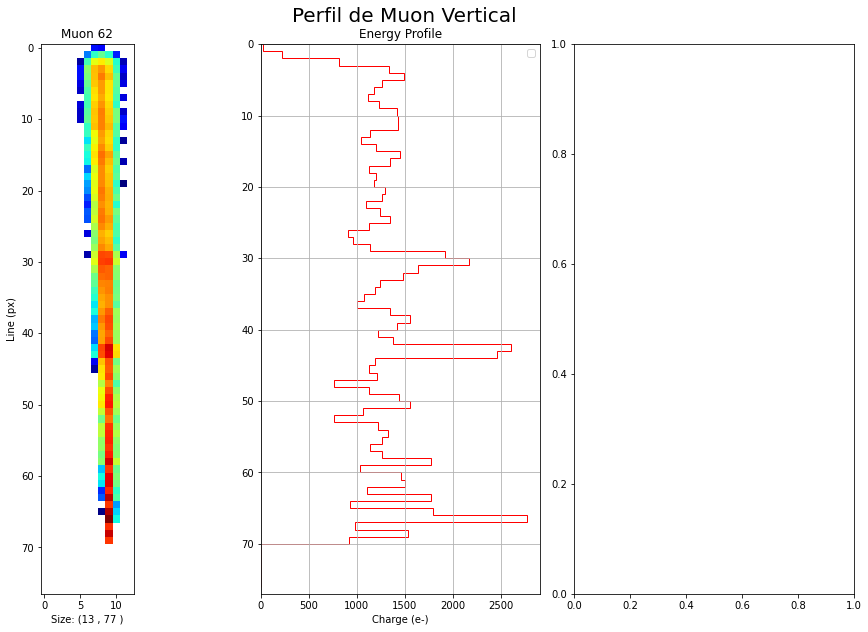

In [89]:
ColorMap = 'jet'
Norm_log = matplt.colors.LogNorm()

Delta_inicial = 0
Delta_final = 0
extension = 1
n_index  = 10

for index in range(0, len(lists_muon_labels_212)):
    fig, axs = plt.subplots(ncols=3, nrows=1, figsize = [13,9])
    fig.suptitle('Perfil de Muon Vertical', y = 0.97, size = 20)
    event = list_img_muons[index]
    label = lists_muon_labels_212[index]
    # plt.imshow(event)

    size_x = event.shape[1] # tamaño en x
    size_y = event.shape[0] # tamaño en y
    # print(event.sum())

    print('Number of rows: ', event.shape[0])
    charge_verticalMuon = []
    for index in range(1, size_y):
        line = event[index - 1:index][0]
        charge = line.sum()
        charge_verticalMuon.append(charge)

            
    axs[0].imshow(event, cmap = ColorMap, norm = Norm_log)#, origin='lower')
    axs[0].set_title('Muon ' + str(label))
    axs[0].set_xlabel('Size: (' + str(size_x) + ' , ' + str(size_y) + ' )')
    # x0bar = fig.colorbar(x0, ax=axs[0])

    # en_cor = 4.2 /np.sin(np.radians(thet))
    # en_cor = 4.2/0.00368
    axs[1].stairs(charge_verticalMuon, range(0,len(charge_verticalMuon)+1),  orientation='horizontal', color = 'r')#,  hatch = '////')
    # axs[1].axvline(en_cor, 0, size_y+2, linestyle='--', color='gray', label = str(np.around(en_cor, 4)) +' e-')
    # axs[1].vlines(x = mean_charge, ymin = 0, ymax = len(event) - 1, color = 'k', label = 'Mean Charge \n' + str(mean_charge))

    axs[1].set_ylim(0, size_y)
    # axs[1].set_yticks([1, 2, 3, 4, 5, 6, 7]) 
    axs[1].invert_yaxis()
    # axs[1].set_xlim(0, 4000)


    # axs[1].set_xlabel('Charge (KeV)')
    axs[1].set_xlabel('Charge (e-)')
    axs[0].set_ylabel('Line (px)')
    # axs[1].set_ylim(0,len(event) - 1 )
    axs[1].set_title('Energy Profile')
    axs[1].legend()
    axs[1].grid()
    plt.tight_layout()
    plt.show()

Total Muons: 1


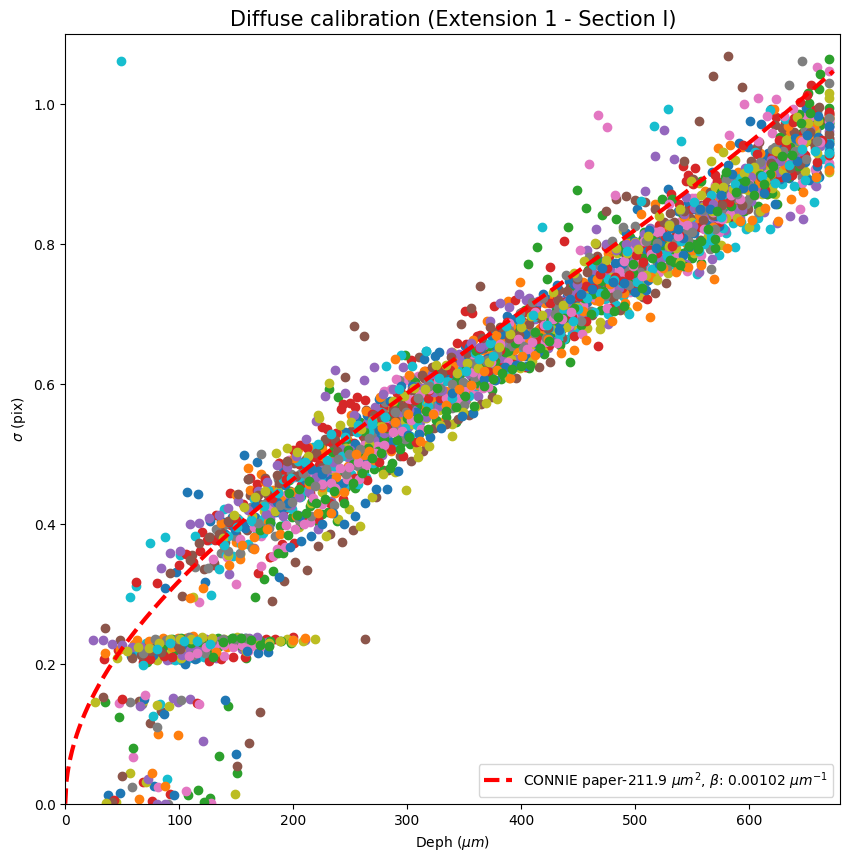

In [ ]:
from ROOT import TF1, TH1F
CCD_depth = 675 # micras
Bins = 50

extension = 1
label_muon = 1
img_sigma = 0.0003  # KeV 
# print(img_sigma)
fig, axs_all = plt.subplots(figsize = [10,10])


list_muonlabels0 = [19]

label_muon = 9
# list_muonlabels1 = [10, 18, 19, 22, 26, 28,41,42,44,47,48,52,56,63,65]
list_muonlabels1 = [10,12,14, 18, 19, 22, 24, 26, 28,30,31,36,41,42,44,45,47,48,49,52,53,55,56,61,62,63,65]

# list_muonlabels = list_muonlabels0 + list_muonlabels1
list_muonlabels = list_muonlabels0

print('Total Muons: {}'.format(len(list_muonlabels)))

for index in range(0, len(list_img_muons)):

    if index not in list_muonlabels1:
        # print("Original Index: ", index)
        Delta_inicial = 3    # px
        Delta_final = 6     # px

        event = list_img_muons[index]
        size_x = event.shape[1]
        size_y = event.shape[0]

        # lines = 0
        Longitud_XY = size_y 
        Z_inicial = (Delta_inicial * CCD_depth) / (Longitud_XY - Delta_final)
        # print('Muon: ', label_muon, ', Shape (X, Y): ', event.shape[1], event.shape[0])

        list_fitsigmas = []
        if index not in list_muonlabels1:
            Delta_inicial = Delta_final
            Delta_final = Delta_inicial
        else:
            print(index)


        for lable_line in range(Delta_inicial, size_y - Delta_final):
            line = event[lable_line - 1:lable_line][0]
            Carga_renglon = line.sum()
            Mean_carga = np.mean(line)
            Longitud_linea = len(line)


            Mean_in  = 0
            var = 0
            carga_cuadrada = 0

            ### Se calcula el X promedio ##
            for pixel in range(0, Longitud_linea):
                if line[pixel]:
                    element_pixel = (pixel * line[pixel]) / Carga_renglon
                    Mean_in = Mean_in + element_pixel
                else:
                    element_pixel = 0
                
                Mean_in = Mean_in + element_pixel

            ## Calcula la suma de las cargas al cuadrado ##
            for pixel in np.arange(0, Longitud_linea, 1):
                if line[pixel]:
                    element_pixel = (line[pixel])**2
                else:
                    element_pixel = 0

                carga_cuadrada = carga_cuadrada + element_pixel 

            Mean_carga_cuadrada = carga_cuadrada/Longitud_linea

            ### Se calcula la varianza ##
            for pixel in np.arange(0, Longitud_linea, 1):
                if line[pixel]:
                    # element_pixel =(1 / (Longitud_linea - 1)) * (pixel - Mean_in)**2 * line[pixel]
                    element_pixel =(1 / (Longitud_linea - 1)) * (pixel - Mean_in)**2
                    var = var + element_pixel  ### COreggir la varianza con otro estimados

                    ### Se corrige la varianza con la carga ###
                    var_true = var * (Mean_carga_cuadrada / (Mean_carga**2))
                    # var_true = var / Carga_renglon

                    ### Se calcula la sigma ###
                    sigma_in = np.sqrt(var_true)
                    # print(sigma_in)
                    # sigma_in = np.sqrt(var_true)


            ##Se crea un arreglo para usarlo en el plot de los datos, y se realiza el juste ##
            list_xlabel = np.arange(0.5, len(line), 1)


            ## Ajuste gaussiano con ROOT ##
            fgaus2 = TF1("fgauss","gaus",  0,  len(line.flatten()), 3) # TF1("nombre", "funcion escrita como en root", min, max, #parametros)
            h3=TH1F("histogram", "Distribution of Line", len(line.flatten()) + 1, 0,  len(line.flatten()) )

            for jndex in range(0, len(line)):
                if line[jndex] != 0:
                    # print(index, line[index])
                    h3.SetBinContent( jndex + 1, line[jndex])
                    err = np.sqrt((img_sigma)**2 + line[jndex])
                    h3.SetBinError(jndex + 1,err )
                    # h3.SetBinError(index + 1, img_sigma)
                    # h3.SetBinError(index + 1, 0.001)
                    #print(pixel_value)

            fgaus2.SetParameters(np.max(line),Mean_in,sigma_in) # Establecer parametros iniciales del fit, de manera visual es posible determinarlos como una primera aproximacion
            h3.Fit(fgaus2, "RQNL")

            fit_const = fgaus2.GetParameters()[0]
            fit_mean = fgaus2.GetParameters()[1]
            fit_sigma = fgaus2.GetParameters()[2]


            true_sigma = np.sqrt(fit_sigma**2 + Carga_renglon*img_sigma**2)

            # fit_sigma = sigma_in
            # print('Sigma fit: ', fit_sigma)
            list_fitsigmas.append(fit_sigma)

            del h3

        list_deep = []
        list_xlabel_sigmas = np.linspace(Z_inicial, CCD_depth, len(list_fitsigmas))
        for deep in list_xlabel_sigmas:
            list_deep.append(deep)

        # print(list_muonlabels1)
        if index not in list_muonlabels1:
            # print('Gola', list_fitsigmas[0], list_fitsigmas[-1])
            list_fitsigmas.reverse()
            # print(index)
            # print('Agios', list_fitsigmas[0], list_fitsigmas[-1], end='\n\n')
        # else:
            # print(index)

        # axs_all.scatter(list_deep, list_fitsigmas, label = 'Muon: ' + str(index))
        axs_all.scatter(list_deep, list_fitsigmas)

    else:
        continue

def diffution_curve(z, alpha, beta):
    return np.sqrt((alpha * np.log(1 - (beta * z))))

fit_range = np.arange(0, 675)
# Label = r'$\sqrt{\alpha \ln(1 - \beta z)}$ fit $\alpha$:' + str(np.around(-211.9, 1)) + r' $\mu m^{2}$, $\beta$: ' + str(np.around(0.0012, 6)) + r' $\mu m^{-1}$'
Label = r'CONNIE paper' + str(np.around(-211.9, 1)) + r' $\mu m^{2}$, $\beta$: ' + str(np.around(0.00102, 6)) + r' $\mu m^{-1}$'

axs_all.plot(fit_range, diffution_curve(fit_range, alpha=-211.9, beta=0.00102) / 15, '--r', linewidth = 3, label = Label)
# axs_all.plot(fit_range, diffution_curve(fit_range, alpha=fit_alpha, beta=fit_beta)/15, '--k', linewidth = 3, label= Label)
# axs_all.plot(fit_range, diffution_curve(fit_range, alpha=-292.4325743170209, beta=3.990904646095944e-06), '--c', linewidth = 2, label='Fit CONNIE')

axs_all.set_title('Diffuse calibration (Extension 1 - Section I)', size = 15)#, y=0.92)}
axs_all.set_ylabel(r'$\sigma$ (pix)')
axs_all.set_xlabel(r'Deph ($\mu m$)')
axs_all.set_ylim(0, 1.1)
axs_all.set_xlim(0, 680)
axs_all.legend()
axs_all.grid
plt.show()

In [97]:
from ROOT import TGraph, TLegend, TCanvas
list_all_sigmas = []
list_all_deeps = []

for index in range(0, len(list_img_muons)):
    
    if index not in list_muonlabels1:
    # if index in list_muonlabels1:
        Delta_inicial = 1    # px
        Delta_final = 5     # px

        event = list_img_muons[index]
        size_x = event.shape[1]
        size_y = event.shape[0]

        # lines = 0
        Longitud_XY = size_y 
        Z_inicial = (Delta_inicial * CCD_depth) / (Longitud_XY - Delta_final)
        # print('Muon: ', label_muon, ', Shape (X, Y): ', event.shape[1], event.shape[0])

        list_fitsigmas = []
        if label_muon in list_muonlabels1:
            Delta_inicial = Delta_final
            Delta_final = Delta_inicial

        for lable_line in range(Delta_inicial, size_y - Delta_final):
            line = event[lable_line - 1:lable_line][0]
            Carga_renglon = line.sum()
            Mean_carga = np.mean(line)
            Longitud_linea = len(line)


            Mean_in  = 0
            var = 0
            carga_cuadrada = 0

            ### Se calcula el X promedio ##
            for pixel in range(0, Longitud_linea):
                if line[pixel]:
                    element_pixel = (pixel * line[pixel]) / Carga_renglon
                    Mean_in = Mean_in + element_pixel
                else:
                    element_pixel = 0
                
                Mean_in = Mean_in + element_pixel

            ## Calcula la suma de las cargas al cuadrado ##
            for pixel in np.arange(0, Longitud_linea, 1):
                if line[pixel]:
                    element_pixel = (line[pixel])**2
                else:
                    element_pixel = 0

                carga_cuadrada = carga_cuadrada + element_pixel 

            Mean_carga_cuadrada = carga_cuadrada/Longitud_linea

            ### Se calcula la varianza ##
            for pixel in np.arange(0, Longitud_linea, 1):
                if line[pixel]:
                    element_pixel =(1 / (Longitud_linea - 1)) * (pixel - Mean_in)**2 * line[pixel]
                    var = var + element_pixel  ### COreggir la varianza con otro estimados

            ### Se corrige la varianza con la carga ###
            # var_true = var * (Mean_carga_cuadrada / (Mean_carga**2))
            var_true = var / Carga_renglon

            ### Se calcula la sigma ###
            sigma_in = np.sqrt(var)
            # print(sigma_in)
            # sigma_in = np.sqrt(var_true)


            ##Se crea un arreglo para usarlo en el plot de los datos, y se realiza el juste ##
            list_xlabel = np.arange(0.5, len(line), 1)


            ## Ajuste gaussiano con ROOT ##
            fgaus2 = TF1("fgauss","gaus",  0,  len(line.flatten()), 3) # TF1("nombre", "funcion escrita como en root", min, max, #parametros)
            h3=TH1F("histogram", "Distribution of Line", len(line.flatten()) + 1, 0,  len(line.flatten()) )

            for jndex in range(0, len(line)):
                if line[jndex] != 0:
                    # print(index, line[index])
                    h3.SetBinContent( jndex + 1, line[jndex])
                    err = np.sqrt((img_sigma)**2 + line[jndex])
                    h3.SetBinError(jndex + 1,err )
                    # h3.SetBinError(index + 1, img_sigma)
                    # h3.SetBinError(index + 1, 0.001)
                    #print(pixel_value)

            fgaus2.SetParameters(np.max(line),Mean_in,sigma_in) # Establecer parametros iniciales del fit, de manera visual es posible determinarlos como una primera aproximacion
            h3.Fit(fgaus2, "RQNL")
            # h3.Fit(fgaus2, "RQN")

            fit_const = fgaus2.GetParameters()[0]
            fit_mean = fgaus2.GetParameters()[1]
            fit_sigma = fgaus2.GetParameters()[2]


            # fit_sigma = sigma_in
            # print('Sigma fit: ', fit_sigma)
            list_fitsigmas.append(fit_sigma)

            del h3

        list_deep = []
        list_xlabel_sigmas = np.linspace(Z_inicial, CCD_depth, len(list_fitsigmas))
        for deep in list_xlabel_sigmas:
            list_deep.append(deep)

        if index not in list_muonlabels1:
            # print('Gola', list_fitsigmas[0], list_fitsigmas[-1])
            list_fitsigmas.reverse()
            # print('Agios', list_fitsigmas[0], list_fitsigmas[-1], end='\n\n')

        for index in range(0, len(list_fitsigmas)):
            list_all_sigmas.append(list_fitsigmas[index])
            list_all_deeps.append(list_deep[index])

        # axs_all.scatter(list_deep, list_fitsigmas, marker='2', label = 'Muon: ' + str(label_muon))
    else:
        continue
del list_fitsigmas
del list_deep



# fit_range = np.arange(0, 900)
# axs_all.scatter(list_all_deeps, list_all_sigmas, marker='2')
new_list_allsig = []
new_list_alldeeps = []

for index in range(0, len(list_all_sigmas)):
    if list_all_sigmas[index]> 0.25 and list_all_deeps[index]>0:
        new_list_allsig.append(list_all_sigmas[index])
        new_list_alldeeps.append(list_all_deeps[index])
    else:
        continue

h_model = TGraph(len(new_list_allsig), np.array(new_list_alldeeps),np.array(new_list_allsig))
h_model.SetMarkerStyle(2) # Set marker style (e.g., solid circle)
h_model.SetTitle("Diffution Model (Vertical Muons)")
h_model.GetXaxis().SetTitle("Depth (#mu m)")
h_model.GetYaxis().SetTitle("Spread (px)")
h_model.SetStats(0)
h_model.GetXaxis().SetRangeUser(0, 680)
h_model.GetYaxis().SetRangeUser(0, 1.2)

h_modelall = TGraph(len(list_all_sigmas), np.array(list_all_deeps),np.array(list_all_sigmas))
h_modelall.SetMarkerStyle(2) # Set marker style (e.g., solid circle)
h_modelall.SetMarkerColor(15)
# h_modelall.SetTitle("Diffution Model (Vertical Muons with #frac{\pi}{2} rad)")
h_modelall.SetTitle("Diffution Model (Vertical Muons with #frac{3\pi}{2} rad)")
h_modelall.GetXaxis().SetTitle("Depth (#mu m)")
h_modelall.GetYaxis().SetTitle("Spread (px)")
h_modelall.GetXaxis().SetRangeUser(0, 680)
h_modelall.GetYaxis().SetRangeUser(0, 1.2)
# h_modelall.SetStats(0)

Range_fit = [0, 680]
diff_curve = TF1("diff_curve", "sqrt(([0] * log(1 - [1]*x)))/15", Range_fit[0], Range_fit[1], 2) #np.sqrt(np.abs(alpha * np.log(1 - (beta * z))))
diff_curveCONNIE = TF1("diff_curve", "sqrt(([0] * log(1 - [1]*x)))/15", 0, Range_fit[1], 2)
diff_curveCONNIE.SetParameters(-211.9, 0.00102)
diff_curveCONNIE.SetLineColor(6)

diff_curveF = TF1("diff_curveF", "sqrt(([0] * log(1 - [1]*x)))/15", 0, Range_fit[1], 2)
diff_curveF.SetParameters(-807.789, 0.00031)
diff_curveF.SetLineColor(7)

diff_curve.SetParameters(-800, 0.00014) # Establecer parametros iniciales del fit, de manera visual es posible determinarlos como una primera aproximacion
h_model.Fit(diff_curve, "RNQ")



fit_alpha = diff_curve.GetParameters()[0]
fit_beta = diff_curve.GetParameters()[1]
chi2 = diff_curve.GetChisquare()
ndf = diff_curve.GetNDF()
prob = diff_curve.GetProb()

fit_alpha_err = diff_curve.GetParErrors()[0]
fit_beta_err = diff_curve.GetParErrors()[1]

diff_curveTrue = TF1("diff_curve", "sqrt(([0] * log(1 - [1]*x)))/15", 0, 680, 2)
diff_curveTrue.SetParameters(fit_alpha, fit_beta)

print('Alpha: ', fit_alpha, '+- ', fit_alpha_err) 
print('Beta: ', fit_beta,  '+- ', fit_beta_err)
print('Chi2/ndf: ', chi2, '/', ndf)
print('Prob: ', prob)

c3=TCanvas("","", 1000, 600)
h_modelall.Draw("AP same")
h_model.Draw("P same")
diff_curveTrue.Draw("same")
# diff_curve.Draw("same")
diff_curveCONNIE.Draw("same")
diff_curveF.Draw("same")
c3.Draw()

leg = TLegend(0.1,0.7,0.48,0.9)
leg.AddEntry(diff_curveTrue, r"\sqrt{\alpha \log(1 - \beta z)} fit: \alpha= " + str(np.around(fit_alpha, 3)) + r" \mu m^2, \beta= " + str(np.around(fit_beta, 5)) + " \mu m^{-1}", "L")
leg.AddEntry(diff_curveCONNIE, r"CONNIE fit:  \alpha = -211.9 \mu m^2, \beta= 0.00102 \mu m^{-1}", "L")
leg.AddEntry(diff_curveF, r"ICN Sample fit:  \alpha = -807.789 \mu m^2, \beta= 0.00031 \mu m^{-1}", "L")
leg.Draw()

/tmp/ipykernel_5275/421453728.py:66: RuntimeWarning: invalid value encountered in scalar divide
  var_true = var / Carga_renglon


Alpha:  -450.03580489857046 +-  59.40721052754171
Beta:  0.0005584182269372683 +-  6.265248353062339e-05
Chi2/ndf:  43.13174233071064 / 2518
Prob:  1.0
